# Интернет-магазин компьютерных игр

## Описание проекта
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
 
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
 
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Описание данных
**Name** — название игры <br> 
**Platform** — платформа <br>
**Year_of_Release** — год выпуска <br>
**Genre** — жанр игры <br>
**NA_sales** — продажи в Северной Америке (миллионы проданных копий) <br>
**EU_sales** — продажи в Европе (миллионы проданных копий) <br>
**JP_sales** — продажи в Японии (миллионы проданных копий) <br>
**Other_sales** — продажи в других странах (миллионы проданных копий) <br>
**Critic_Score** — оценка критиков (максимум 100) <br>
**User_Score** — оценка пользователей (максимум 10) <br>
**Rating** — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию. <br>
Данные за 2016 год могут быть неполными.

In [4]:
#импорт библиотек
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
from scipy.stats import binom
import seaborn as sns

### Первое знакомство с данными

In [6]:
#путь к файлу
local_path = 'games.csv' #локальный путь
default_path = '/datasets/games.csv' #для проверки

#попытка прочитать файл
try:
    data = pd.read_csv(default_path)
    print('Файл успешно загружен с локального пути')
except FileNotFoundError:
    try:
        data = pd.read_csv(local_path)
        print('Файл успешно загружен с пути для проверок')
    except FileNotFoundError:
        print('Файл не найден ни по одному из путей')
pd.set_option('display.max_columns', None) #увеличим максимальное количество отображающихся столбцов
data.head()

Файл успешно загружен с пути для проверок


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [7]:
data.info() #получение общей информации

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [8]:
data.isna().sum() #количество дубликатов в каждом столбце

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [9]:
data.duplicated().sum() #проверка на явные дубликаты

0

In [10]:
data.columns #проверка названий столбцов

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

### Вывод по Первому знакомству с данными
Датасет **data** состоит из 16715 строк и 11 столбцов. В столбцах присутствую пропуски данных, не все столбцы имеют корректный тип данных, требуется дальнейшая Предобработка данных. Сами столбцы имеют некорректное название, явных дубликатов нет

### Предобработка и подготовка данных

#### 1. Заменим названия столбцов

In [14]:
data.columns = data.columns.str.lower()
data.head(1)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E


#### 2. Заполним пропуски в данных

##### Рассмотрим столбец **"name"**

In [17]:
print('Количество пропусков в столбце "name":', data['name'].isna().sum())
print('Процент пропусков в сравнении с общим количеством строк:', data['name'].isna().sum() / data.shape[0] * 100)

Количество пропусков в столбце "name": 2
Процент пропусков в сравнении с общим количеством строк: 0.011965300628178284


*Столбец **"name"** обозначает название игры и имеет тип данных object. Так как мы не знаем названия двух игр в этих пропущенных значениях, и процент пропусков сильно мал (0.01%), то можно удалить строки с пропущенными значениями – это не повлияет на генеральную совокупность*

In [19]:
data = data.dropna(subset=['name']) #удалим строки, где пропущены значения в столбце "name"
print('Количество строк в датасете:', data.shape[0])
data.isna().sum()

Количество строк в датасете: 16713


name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

##### Рассмотрим столбец **"year_of_release"**

In [21]:
print('Количество пропусков в столбце "year_of_release":', data['year_of_release'].isna().sum())
print('Процент пропусков в сравнении с общим количеством строк:', data['year_of_release'].isna().sum() / data.shape[0] * 100)

Количество пропусков в столбце "year_of_release": 269
Процент пропусков в сравнении с общим количеством строк: 1.6095255190570215


*Столбец **"year_of_release"** обозначает год выпуска игры и имеет вещественный тип данных float64 (далее будет обработан в тип datetime). Так как мы не знаем год выпуска игр в этих пропущенных значениях, и доля пропусков сильно мала (1.6%), то можно удалить строки с пропущенными значениями – это не повлияет на генеральную совокупность*

In [23]:
data = data.dropna(subset=['year_of_release']) #удалим строки, где пропущены значения в столбце "year_of_release"
print('Количество строк в датасете:', data.shape[0])
data.isna().sum()

Количество строк в датасете: 16444


name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

##### Рассмотрим столбец **"critic_score"**

In [25]:
print('Количество пропусков в столбце "critic_score":', data['critic_score'].isna().sum())
print('Процент пропусков в сравнении с общим количеством строк:', data['critic_score'].isna().sum() / data.shape[0] * 100)

Количество пропусков в столбце "critic_score": 8461
Процент пропусков в сравнении с общим количеством строк: 51.453417659936754


In [26]:
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

*Столбец **"critic_score"** обозначает оценку критиков (максимум 100) и имеет вещественный тип данных float64. Процент пропусков сильно велик (51.5%). На среднее или медианное значение заменить нельзя, так как данные не зависимы между собой (рейтинг одной игры не зависит от рейтинга другой игры). Рассмотрев уникальные значения, заменем все пропуски на "-1", так как пропущенных данных много и будем помнить об этом в будущем. Возможно, пропуски данных в данном столбце связаны с тем, что игра была плохо оценена критиками и они не поставили оценку или с ошибкой при переносе данных*

In [28]:
data['critic_score'] = data['critic_score'].fillna(-1)
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score         6605
rating             6676
dtype: int64

##### Рассмотрим столбец **"user_score"**

In [30]:
print('Количество пропусков в столбце "user_score":', data['user_score'].isna().sum())
print('Процент пропусков в сравнении с общим количеством строк:', data['user_score'].isna().sum() / data.shape[0] * 100)

Количество пропусков в столбце "user_score": 6605
Процент пропусков в сравнении с общим количеством строк: 40.166626125030405


In [31]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

*Столбец **"user_score"** обозначает  оценку пользователей (максимум 10) и имеет вещественный тип данных float64. Процент пропусков сильно велик (51.5%). На среднее или медианное значение заменить нельзя, так как данные не зависимы между собой (рейтинг одной игры не зависит от рейтинга другой игры). Рассмотрев уникальные значения, заменем все пропуски на "-1", так как пропущенных данных много и будем помнить об этом в будущем. Также в уникальных значениях заметна запись **"tbd"**, что означает, что оценка находится в дискуссии (To Be Discussed), то есть оценка не определена. А если она не определена, то тоже заменем её на "-1". Возможно, пропуски данных в данном столбце связаны с тем, что игра была плохо оценена критиками и они не поставили оценку или с ошибкой при переносе данных*

In [33]:
data['user_score'] = data['user_score'].fillna(-1)
data['user_score'] = data['user_score'].replace('tbd', -1)
print(data.isna().sum())
print('Уникальные значения столбца "user_score":', data['user_score'].unique())

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score            0
rating             6676
dtype: int64
Уникальные значения столбца "user_score": ['8' -1 '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' '8.8' '6.9' '9.4'
 '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7' '4.1'
 '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3' '4.7'
 '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8' '1.8'
 '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2' '2.3'
 '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']


##### Рассмотрим столбец **"rating"**

In [35]:
print('Количество пропусков в столбце "rating":', data['rating'].isna().sum())
print('Процент пропусков в сравнении с общим количеством строк:', data['rating'].isna().sum() / data.shape[0] * 100)

Количество пропусков в столбце "rating": 6676
Процент пропусков в сравнении с общим количеством строк: 40.59839455120409


In [36]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

*Столбец **"rating"** обозначает  рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию. Столбец имеет тип данных object. Так как мы не располагаем необходимой информацией, чтобы заполнить пропуски, можно оставить эти пропуски без изменений или заполнить их чем-то нейтральным – выберем второй путь и заполним их **"unknown"***

In [38]:
data['rating'] = data['rating'].fillna('unknown')
data.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

*Все пропуски устранены, можно переходить далее*

#### 3. Преобразование данных в нужный тип

##### Столбец **"year_of_release"**

In [42]:
data['year_of_release'] = data['year_of_release'].astype('int32')

*Столбец **year_of_release** (год выпуска) должен быть приведён к типу datetime, однако в дальнейшем нам понадобится только номер года, который мы можем представить в виде целого числа. Скорее всего, неправильный тип возник из-за автоматического переноса данных*

##### Столбец **"critic_score"**

In [45]:
data['critic_score'].dtype

dtype('float64')

In [46]:
data['critic_score'].unique()

array([76., -1., 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [47]:
data['critic_score'] = data['critic_score'].astype('int')
data['critic_score'].dtype

dtype('int32')

*Столбец **"critic_score"** имел сначала вещественный тип данных float64, однако после заполнения пропусков его значения стали все целыми, поэтому столбец был переведет в целочисленный тип данных. Эксперты оценивали продукты компаний в целых числах*

##### Столбец **"user_score"**

In [50]:
data['user_score'].dtypes

dtype('O')

In [51]:
data['user_score'].unique()

array(['8', -1, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [52]:
data['user_score'] = data['user_score'].astype('float32')
data['user_score'].dtype

dtype('float32')

*Столбец **"user_score"** имел сначала тип данных object, однако после заполнения пропусков его значения стали все вещественными числами, поэтому столбец был переведет в вещественный тип данных float32 (float32, а не float64 – чтобы занимать меньше места). Пользователи оценивали продукты компаний в вещественных числах*

*Все данные были преобразованы в нужный тип. Можно перейти к поиску неявных дубликатов*

#### Поиск неявных дубликатов

При поиске дубликатов мы учитываем только три столбца: **"name","platform", "year_of_release"**, потому что пользователи и судьи могут по-разному оценить игру, а вот название, платформа и год выпуска всегда останутся неизменными

In [57]:
data.duplicated(subset=['name','platform', 'year_of_release']).sum() #количество дубликатов до выявления неявных

1

##### Рассмотрим неявные дубликаты в столбце **"name"** 

In [59]:
data['name'].unique()

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Woody Woodpecker in Crazy Castle 5', 'LMA Manager 2007',
       'Haitaka no Psychedelica'], dtype=object)

In [60]:
data['name'] = data['name'].str.lower().replace('.', '')

In [61]:
data['name'].unique()

array(['wii sports', 'super mario bros.', 'mario kart wii', ...,
       'woody woodpecker in crazy castle 5', 'lma manager 2007',
       'haitaka no psychedelica'], dtype=object)

##### Рассмотрим неявные дубликаты в столбце **"genre"** 

In [63]:
data['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [64]:
data['genre'] = data['genre'].str.lower()
data['genre'].unique()

array(['sports', 'platform', 'racing', 'role-playing', 'puzzle', 'misc',
       'shooter', 'simulation', 'action', 'fighting', 'adventure',
       'strategy'], dtype=object)

##### Рассмотрим неявные дубликаты в столбце **"rating"** 

In [66]:
data['rating'].unique()

array(['E', 'unknown', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

In [67]:
data['rating'] = data['rating'].str.lower()
data['rating'].unique()

array(['e', 'unknown', 'm', 't', 'e10+', 'k-a', 'ao', 'ec', 'rp'],
      dtype=object)

In [68]:
data.duplicated(subset=['name','platform', 'year_of_release']).sum()  #количество дубликатов после выявления неявных

1

In [69]:
data = data.drop_duplicates(subset=['name','platform', 'year_of_release'])
data.duplicated(subset=['name','platform', 'year_of_release']).sum()  #количество дубликатов после удаления

0

#### Подсчёт суммарных продаж во всех регионах

In [71]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,Wii,2006,sports,41.36,28.96,3.77,8.45,76,8.0,e,82.54
1,super mario bros.,NES,1985,platform,29.08,3.58,6.81,0.77,-1,-1.0,unknown,40.24
2,mario kart wii,Wii,2008,racing,15.68,12.76,3.79,3.29,82,8.3,e,35.52
3,wii sports resort,Wii,2009,sports,15.61,10.93,3.28,2.95,80,8.0,e,32.77
4,pokemon red/pokemon blue,GB,1996,role-playing,11.27,8.89,10.22,1.00,-1,-1.0,unknown,31.38


### Вывод по Предобработке данных и подготовке данных
В рамках этапа Предобработки данных были выполненные следующие шаги: изменены названия столбцов (приведены к нижнему регистру), обработаны пропуски и объяснены причины их возникновения, преобразованы данные нужные типы, найден и удален один дубликат, а также создан отдельный столбец, в котором произведен подсчёт суммарных продаж по всем регионам. Более подробный последовательны вывод каждого шага представлен ниже:
1. Обработка пропусков
- *Столбец **"name"** обозначает название игры и имеет тип данных object. Так как мы не знаем названия двух игр в этих пропущенных значениях, и процент пропусков сильно мал (0.01%), то можно удалить строки с пропущенными значениями – это не повлияет на генеральную совокупность*
- *Столбец **"year_of_release"** обозначает год выпуска игры и имеет вещественный тип данных float64 (далее будет обработан в тип datetime). Так как мы не знаем год выпуска игр в этих пропущенных значениях, и доля пропусков сильно мала (1.6%), то можно удалить строки с пропущенными значениями – это не повлияет на генеральную совокупность*
- *Столбец **"critic_score"** обозначает оценку критиков (максимум 100) и имеет вещественный тип данных float64. Процент пропусков сильно велик (51.5%). На среднее или медианное значение заменить нельзя, так как данные не зависимы между собой (рейтинг одной игры не зависит от рейтинга другой игры). Рассмотрев уникальные значения, заменем все пропуски на "-1", так как пропущенных данных много и будем помнить об этом в будущем. Возможно, пропуски данных в данном столбце связаны с тем, что игра была плохо оценена критиками и они не поставили оценку или с ошибкой при переносе данных*
- *Столбец **"user_score"** обозначает  оценку пользователей (максимум 10) и имеет вещественный тип данных float64. Процент пропусков сильно велик (51.5%). На среднее или медианное значение заменить нельзя, так как данные не зависимы между собой (рейтинг одной игры не зависит от рейтинга другой игры). Рассмотрев уникальные значения, заменем все пропуски на "-1", так как пропущенных данных много и будем помнить об этом в будущем. Также в уникальных значениях заметна запись **"tbd"**, что означает, что оценка находится в дискуссии (To Be Discussed), то есть оценка не определена. А если она не определена, то тоже заменем её на "-1". Возможно, пропуски данных в данном столбце связаны с тем, что игра была плохо оценена критиками и они не поставили оценку или с ошибкой при переносе данных*
- *Столбец **"rating"** обозначает  рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию. Столбец имеет тип данных object. Так как мы не располагаем необходимой информацией, чтобы заполнить пропуски, можно оставить эти пропуски без изменений или заполнить их чем-то нейтральным – выберем второй путь и заполним их **"unknown"***
2. Преобразование данных в нужный тип
- *Столбец **year_of_release** (год выпуска) должен быть приведён к типу datetime, однако в дальнейшем нам понадобится только номер года, который мы можем представить в виде целого числа. Скорее всего, неправильный тип возник из-за автоматического переноса данных*
- *Столбец **"critic_score"** имел сначала вещественный тип данных float64, однако после заполнения пропусков его значения стали все целыми, поэтому столбец был переведет в целочисленный тип данных. Эксперты оценивали продукты компаний в целых числах*
- *Столбец **"user_score"** имел сначала тип данных object, однако после заполнения пропусков его значения стали все вещественными числами, поэтому столбец был переведет в вещественный тип данных float32 (float32, а не float64 – чтобы занимать меньше места). Пользователи оценивали продукты компаний в вещественных числах*
3. Поиск дубликатов <br>
*При поиске дубликатов мы учитываем только три столбца: **"name","platform", "year_of_release"**, потому что пользователи и судьи могут по-разному оценить игру, а вот название, платформа и год выпуска всегда останутся неизменными. Был произведен поиск дубликатов, однако анализ показал, что неявных дубликатов нет. Все дубликаты удалены*
4. Подсчёт суммарных продаж во всех регионах <br>
*Произведен подсчёт суммарных продаж во всех регионах путём сложения продаж со всех регионов*

### Исследовательский анализ данных

#### Исследование выпуска игр в разные годы

In [75]:
data.pivot_table(index='year_of_release', values='name', aggfunc='count').describe() #выведем описательную статистику

,name
count,37.000000
mean,444.405405
std,451.591535
min,9.000000
25%,36.000000
50%,338.000000
75%,762.000000
max,1427.000000


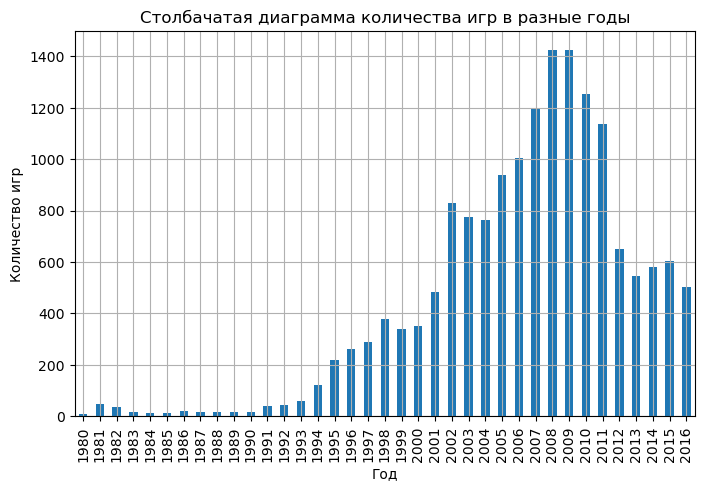

In [76]:
data.pivot_table(index='year_of_release', values='name', aggfunc='count').plot(
    kind='bar',
    figsize=(8,5),
    grid=True,
    legend=False,
    title='Столбачатая диаграмма количества игр в разные годы',
    xlabel='Год',
    ylabel='Количество игр'
)
plt.show()

##### Вывод по Исследованию выпуска игр в разные годы
Исследование показало, что 2008 и 2009 года имеют наибольшее количество выпущенных игр, которое достигает примерно 1427 штук. Данные таблицы важны для каждого периода из-за того, что сама диаграмма имеет волнообразный пик (идёт не постоянное нарастание количества значений, а они то убывают, то возрастают) 

#### Исследование продаж по платформам

In [79]:
top_platforms = data.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).head(6)
top_platforms

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.33
Wii,891.18
DS,802.78
PS,727.58


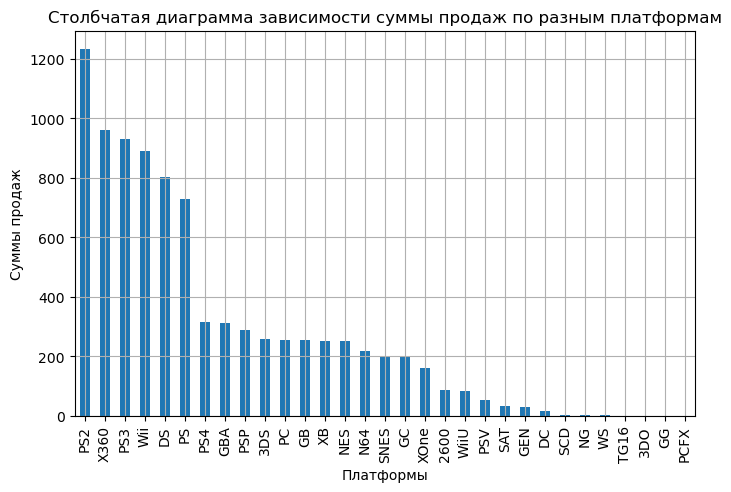

In [80]:
data.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).plot(
    kind='bar',
    figsize=(8,5),
    grid=True,
    legend=False,
    title='Столбчатая диаграмма зависимости суммы продаж по разным платформам',
    xlabel='Платформы',
    ylabel='Суммы продаж'
)
plt.show()

*Исходя из сводной таблицы и **"Столбчатой диаграммы зависимости суммы продаж по разным платформам"** видно, что наибольшая сумма продаж представлена у 6 фирм. Больше 6 брать не стоит, тк разрыв между значениями будет слишком большой*

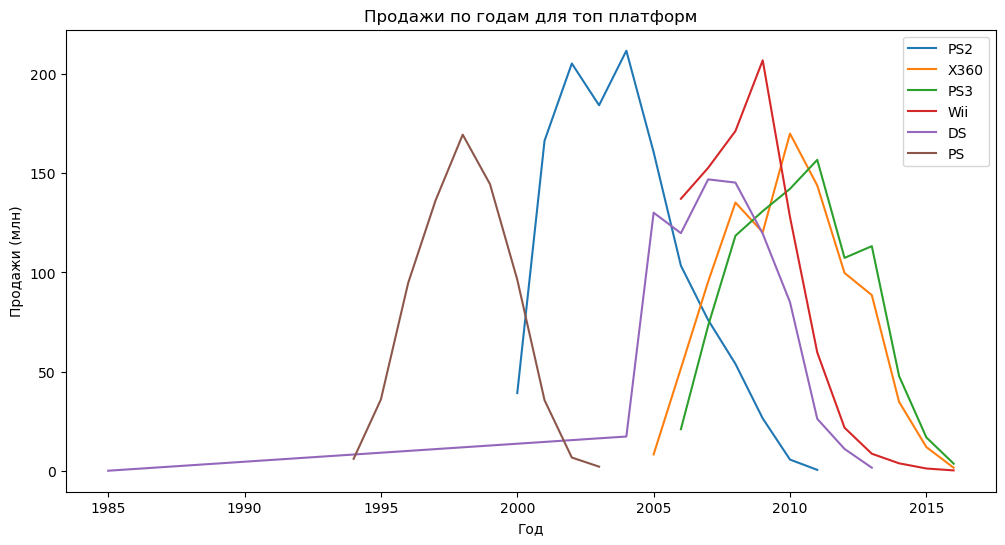

In [82]:
plt.figure(figsize=(12, 6)) #построим для каждой платформы график на одной плоскости
for platform in top_platforms.index: 
    platform_data = data[data['platform'] == platform] #для каждой отдельной платформы
    platform_sales_per_year = platform_data.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').sum(axis=1) #объединим графики, запишем сумму
    platform_sales_per_year.plot(label=platform) #нарисуем

plt.title('Продажи по годам для топ платформ')
plt.xlabel('Год')
plt.ylabel('Продажи (млн)')
plt.legend()
plt.show()

*Судя по графику, видно, что платформа **"DS"** охватывает слишком длинный период. Проверим эту платформу*

In [84]:
data[data['platform'] == 'DS'].sort_values(by='year_of_release').head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,strongest tokyo university shogi ds,DS,1985,action,0.00,0.00,0.02,0.00,-1,-1.0,unknown,0.02
13463,cocoto kart racer,DS,2004,racing,0.04,0.00,0.00,0.00,-1,-1.0,e,0.04
11517,kenshuui tendo dokuta,DS,2004,simulation,0.00,0.00,0.08,0.00,-1,-1.0,unknown,0.08
4421,the urbz: sims in the city (all regions sales),DS,2004,simulation,0.40,0.01,0.02,0.00,-1,-1.0,unknown,0.43
7902,daigasso! band brothers,DS,2004,misc,0.00,0.00,0.19,0.00,-1,-1.0,unknown,0.19
2668,pokemon dash,DS,2004,racing,0.21,0.14,0.38,0.04,46,5.9,e,0.77
10940,puyo pop fever (jp sales),DS,2004,puzzle,0.00,0.00,0.09,0.00,-1,-1.0,unknown,0.09
691,warioware touched!,DS,2004,puzzle,0.51,0.45,1.21,0.13,-1,-1.0,unknown,2.30
8465,zoo keeper,DS,2004,puzzle,0.10,0.01,0.05,0.01,74,7.5,e,0.17
14087,mahjong taikai,DS,2004,misc,0.00,0.00,0.04,0.00,-1,-1.0,unknown,0.04


*Исходя из таблицы выше, можно сделать вывод, что платформа **DS** встречается до 2004 года только один раз – в 1985 году – это строка с индексом 15957. Скорее всего, она была добавлена случайно, тк это значение встречается только один раз, поэтому мы можем её удалить*

In [86]:
data = data.drop(index=15957)
data.reset_index(drop=True)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,Wii,2006,sports,41.36,28.96,3.77,8.45,76,8.0,e,82.54
1,super mario bros.,NES,1985,platform,29.08,3.58,6.81,0.77,-1,-1.0,unknown,40.24
2,mario kart wii,Wii,2008,racing,15.68,12.76,3.79,3.29,82,8.3,e,35.52
3,wii sports resort,Wii,2009,sports,15.61,10.93,3.28,2.95,80,8.0,e,32.77
4,pokemon red/pokemon blue,GB,1996,role-playing,11.27,8.89,10.22,1.00,-1,-1.0,unknown,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16437,samurai warriors: sanada maru,PS3,2016,action,0.00,0.00,0.01,0.00,-1,-1.0,unknown,0.01
16438,lma manager 2007,X360,2006,sports,0.00,0.01,0.00,0.00,-1,-1.0,unknown,0.01
16439,haitaka no psychedelica,PSV,2016,adventure,0.00,0.00,0.01,0.00,-1,-1.0,unknown,0.01
16440,spirits & spells,GBA,2003,platform,0.01,0.00,0.00,0.00,-1,-1.0,unknown,0.01


*Теперь у нас ещё на одну строку сократился датасет. Перерисуем график*

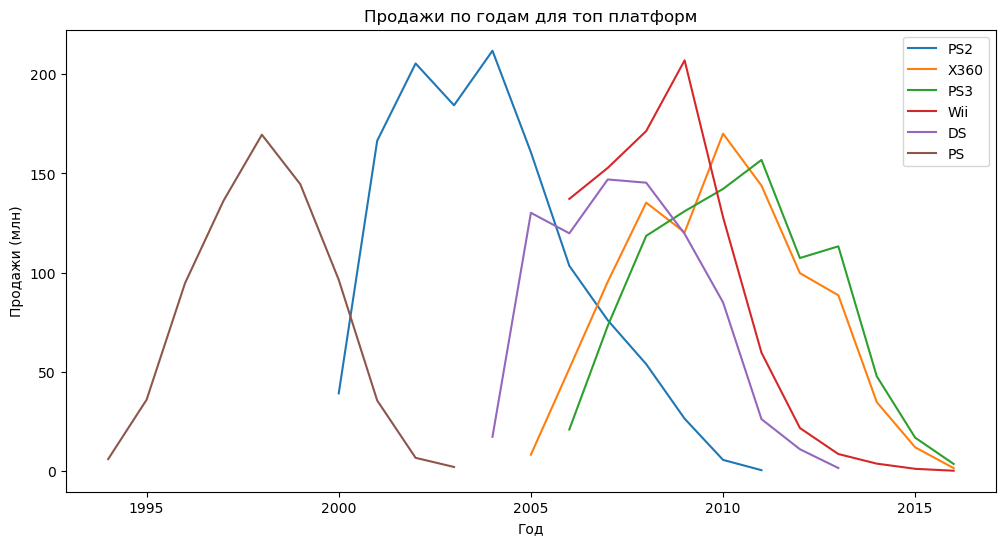

In [88]:
plt.figure(figsize=(12, 6)) #построим для каждой платформы график на одной плоскости
for platform in top_platforms.index: 
    platform_data = data[data['platform'] == platform] #для каждой отдельной платформы
    platform_sales_per_year = platform_data.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').sum(axis=1) #объединим графики, запишем сумму
    platform_sales_per_year.plot(label=platform) #нарисуем

plt.title('Продажи по годам для топ платформ')
plt.xlabel('Год')
plt.ylabel('Продажи (млн)')
plt.legend()
plt.show()

*Определим, за какой характерный срок появляются новые и исчезают старые платформы по всей совокупности*

life_cycle = data.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
life_cycle.columns = ['platform', 'min_year', 'max_year']
life_cycle.head()

life_cycle['difference'] = life_cycle['max_year'] - life_cycle['min_year'] + 1 #добавляем единицу в целях того, чтобы учитывать правую границу разности ещё\
life_cycle.head()

life_cycle['difference'].median() #находим срок жизненного цикла

*Выше были определены 6 платформ, которые представлены в **"Столбчатой диаграмме зависимости суммы продаж по разным платформам"**. Опираясь на данную диаграмму, выведем на экран минимальный и максимальный год, а также посчитаем разницу и найдем жизненный цикл с актуальным периодом*

In [94]:
new_data = data[data['platform'].isin(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS'])]
new_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,Wii,2006,sports,41.36,28.96,3.77,8.45,76,8.0,e,82.54
2,mario kart wii,Wii,2008,racing,15.68,12.76,3.79,3.29,82,8.3,e,35.52
3,wii sports resort,Wii,2009,sports,15.61,10.93,3.28,2.95,80,8.0,e,32.77
6,new super mario bros.,DS,2006,platform,11.28,9.14,6.50,2.88,89,8.5,e,29.80
7,wii play,Wii,2006,misc,13.96,9.18,2.93,2.84,58,6.6,e,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16700,mezase!! tsuri master ds,DS,2009,sports,0.00,0.00,0.01,0.00,-1,-1.0,unknown,0.01
16704,plushees,DS,2008,simulation,0.01,0.00,0.00,0.00,-1,-1.0,e,0.01
16709,score international baja 1000: the official game,PS2,2008,racing,0.00,0.00,0.00,0.00,-1,-1.0,unknown,0.00
16710,samurai warriors: sanada maru,PS3,2016,action,0.00,0.00,0.01,0.00,-1,-1.0,unknown,0.01


In [95]:
life_cycle = new_data.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
life_cycle.columns = ['platform', 'min_year', 'max_year']
life_cycle

,platform,min_year,max_year
0,DS,2004,2013
1,PS,1994,2003
2,PS2,2000,2011
3,PS3,2006,2016
4,Wii,2006,2016
5,X360,2005,2016


In [96]:
life_cycle['difference'] = life_cycle['max_year'] - life_cycle['min_year'] + 1 #добавляем единицу в целях того, чтобы учитывать правую границу разности ещё\
life_cycle

,platform,min_year,max_year,difference
0,DS,2004,2013,10
1,PS,1994,2003,10
2,PS2,2000,2011,12
3,PS3,2006,2016,11
4,Wii,2006,2016,11
5,X360,2005,2016,12


In [97]:
life_cycle['difference'].median() #находим срок жизненного цикла

11.0

*Жизненный цикл компаний равен 11 лет. Теперь определим актуальный период. Соглсано практике, в традиционных бизнесах редко берут данные более чем за 2-3 года. А в такой динамично меняющейся индустрии, как компьютерные игры и вовсе не стоит брать слишком большой временной интервал - иначе обязательно можно захватить уже отжившие тренды. Но и слишком короткий период тоже брать не стоит. Именно поэтому оптимальным **актуальным периодом** является срок **2-3 года***

In [99]:
actual = 3 #актуальный период

##### Вывод по Исследованию продаж по платформам
Исходя из сводной таблицы и **"Столбчатой диаграммы зависимости суммы продаж по разным платформам** видно, что наибольшая сумма продаж представлена у 6 фирм. Больше 6 брать не стоит, тк разрыв между значениями будет слишком большой. Далее был построен график, показывающий **"Продажи по годам для топ платформ"**. Судя по графику, видно, что платформа **"DS"** охватывает слишком длинный период. Проверили эту платформу. Исходя из таблицы, можно сделать вывод, что платформа **DS** встречается до 2004 года только один раз – в 1985 году – это строка с индексом 15957. Скорее всего, она была добавлена случайно, тк это значение встречается только один раз, поэтому мы можем её удалить. Была удалена одна строка и перерисован график, после чего найден **срок жизненного цикла платформ** путём медианного значения разницы размаха лет существования – **он равен 11 лет**. Теперь определим актуальный период. Соглсано практике, в традиционных бизнесах редко берут данные более чем за 2-3 года. А в такой динамично меняющейся индустрии, как компьютерные игры и вовсе не стоит брать слишком большой временной интервал - иначе обязательно можно захватить уже отжившие тренды. Но и слишком короткий период тоже брать не стоит. Именно поэтому оптимальным **актуальным периодом** является срок **2-3 года**

#### Исследование лидирующих по продажам платформ

In [102]:
#выбор актуальных платформ (за последние 3 года)
actual_platforms = data.query('year_of_release >= 2016-@actual').pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).reset_index()                        
actual_platforms = actual_platforms.head(10)['platform']
actual_platforms

0     PS4
1     PS3
2    XOne
3     3DS
4    X360
5    WiiU
6      PC
7     PSV
8     Wii
9     PSP
Name: platform, dtype: object

In [103]:
#cоздание нового датафрйема с данными за актуальный период
actual_data = data.query('year_of_release >= 2016-@actual').reset_index(drop= True)
actual_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,grand theft auto v,PS3,2013,action,7.02,9.09,0.98,3.96,97,8.2,m,21.05
1,grand theft auto v,X360,2013,action,9.66,5.14,0.06,1.41,97,8.1,m,16.27
2,call of duty: black ops 3,PS4,2015,shooter,6.03,5.86,0.36,2.38,-1,-1.0,unknown,14.63
3,pokemon x/pokemon y,3DS,2013,role-playing,5.28,4.19,4.35,0.78,-1,-1.0,unknown,14.60
4,grand theft auto v,PS4,2014,action,3.96,6.31,0.38,1.97,97,8.3,m,12.62


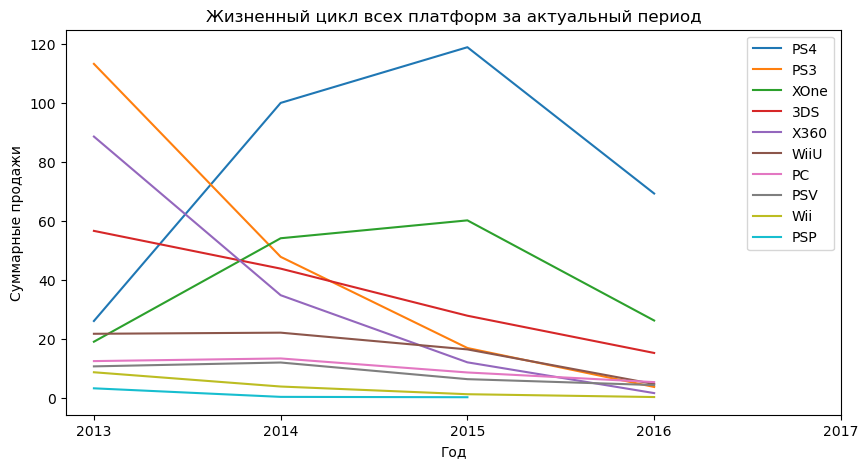

In [104]:
for platform in actual_platforms:
    (actual_data.query('platform == @platform') 
    .pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum') #сводня таблица для продаж по годам
    .sort_values('year_of_release', ascending = False)['total_sales']
    .plot(kind='line', figsize = (10, 5), label=platform))
    plt.title('Жизненный цикл всех платформ за актуальный период')
    plt.xticks(np.arange(2013, 2018, step=1))
    plt.xlabel('Год')
    plt.ylabel('Суммарные продажи')
    plt.legend() 

##### Вывод по Исследованию лидирующих по продажам платформ
В процессе данного исследования было отобрано 10 актуальных платформ, после чего был выведен датафрейм с данными платформ за актуальный период, далее был построен линейный график **"Жизненный цикл всех платформ за актуальный период"**, согласно которому наиболее прибыльными кажутся платформы **PS4** и **XOne**

#### Boxplot по глобальным продажам игр в разбивке по платформам

In [107]:
actual_data['total_sales'].describe()

count    2233.000000
mean        0.488442
std         1.235226
min         0.010000
25%         0.030000
50%         0.110000
75%         0.400000
max        21.050000
Name: total_sales, dtype: float64

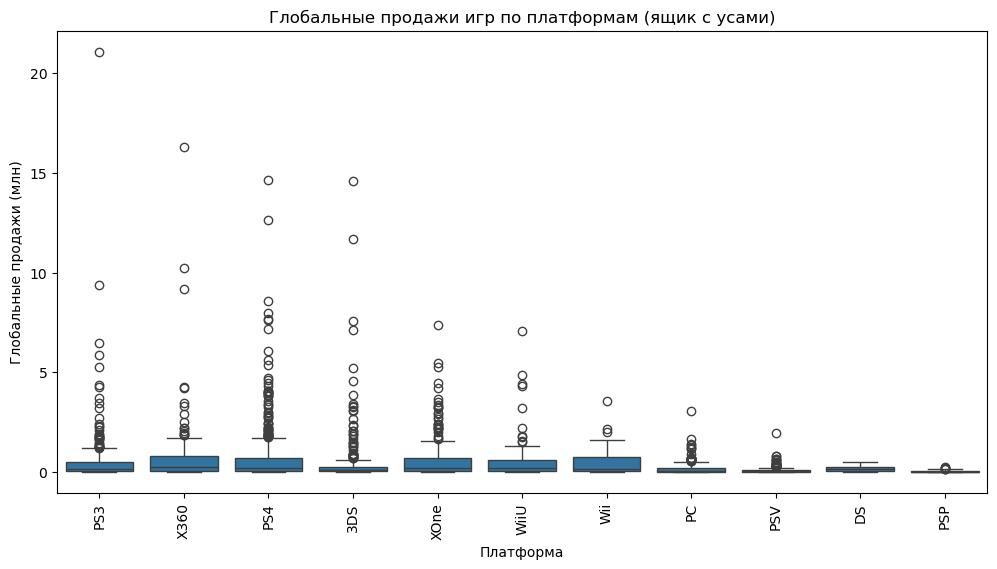

In [108]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='platform', y='total_sales', data=actual_data)
plt.title('Глобальные продажи игр по платформам (ящик с усами)')
plt.xlabel('Платформа')
plt.ylabel('Глобальные продажи (млн)')
plt.xticks(rotation=90)
plt.show()

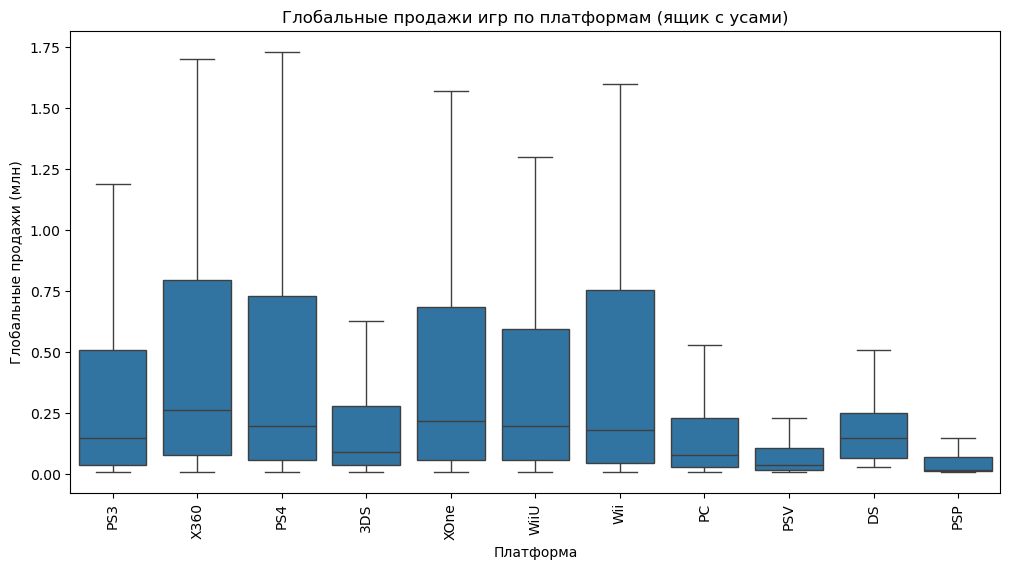

In [109]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='platform', y='total_sales', data=actual_data, showfliers=False) #отдельно выведено без выбросов
plt.title('Глобальные продажи игр по платформам (ящик с усами)')
plt.xlabel('Платформа')
plt.ylabel('Глобальные продажи (млн)')
plt.xticks(rotation=90)
plt.show()

##### Вывод по Boxplot по глобальным продажам игр в разбивке по платформам

У каждой платформы присутствуют выбросы,что говорит о том, что есть игры, которые значительно превосходят по продажам другие игры на тех же платформах. Например, на платформе PS3 есть игры с продажами более 20 миллионов <br>
У всех платформ присутствует значительный разброс глобальных продаж. Это указывает на наличие игр с очень различными уровнями популярности и продаж внутри одной и той же платформы <br>
Платформы X360 и XOne имеют больший интерквартильный размах, что указывает на значительную вариацию продаж среди игр на этих платформах

#### Исследование о влиянии отзывов пользователей и критиков на продажи внутри одной популярной платформы 

In [113]:
actual_data.sort_values('total_sales')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
2232,winning post 8 2016,PSV,2016,simulation,0.00,0.00,0.01,0.00,-1,-1.0,unknown,0.01
2104,hyakka yakou,PSV,2015,action,0.00,0.00,0.01,0.00,-1,-1.0,unknown,0.01
2103,the book of unwritten tales 2,WiiU,2016,adventure,0.00,0.01,0.00,0.00,-1,-1.0,t,0.01
2102,worms: wmd,XOne,2016,action,0.01,0.00,0.00,0.00,75,8.1,e10+,0.01
2101,htol#niq: the firefly diary,PSV,2014,platform,0.00,0.00,0.01,0.00,58,7.7,t,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...
4,grand theft auto v,PS4,2014,action,3.96,6.31,0.38,1.97,97,8.3,m,12.62
3,pokemon x/pokemon y,3DS,2013,role-playing,5.28,4.19,4.35,0.78,-1,-1.0,unknown,14.60
2,call of duty: black ops 3,PS4,2015,shooter,6.03,5.86,0.36,2.38,-1,-1.0,unknown,14.63
1,grand theft auto v,X360,2013,action,9.66,5.14,0.06,1.41,97,8.1,m,16.27


*Сделаем поочередно, чтобы не перепутаться*

In [115]:
platform_sales = actual_data.pivot_table(index='platform', values='total_sales', aggfunc='sum') #создание сводной таблицы для платформ и их суммарных продаж
platform_sales_sorted = platform_sales.sort_values(by='total_sales', ascending=False) #сортировка по убыванию суммарных продаж
top_5_platforms = platform_sales_sorted.head(5).index.tolist() #топ-5 платформ и преобразование их в список
top_5_platforms

['PS4', 'PS3', 'XOne', '3DS', 'X360']

*Пользователи*

Корреляция между оценками пользователей и продажами по платформе PS4 = -0.03195710900518829


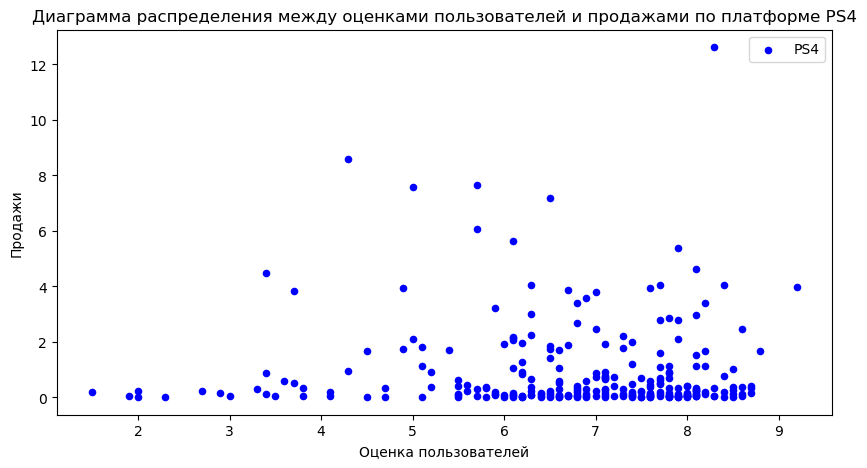

Корреляция между оценками пользователей и продажами по платформе PS3 = 0.0023944009618447988


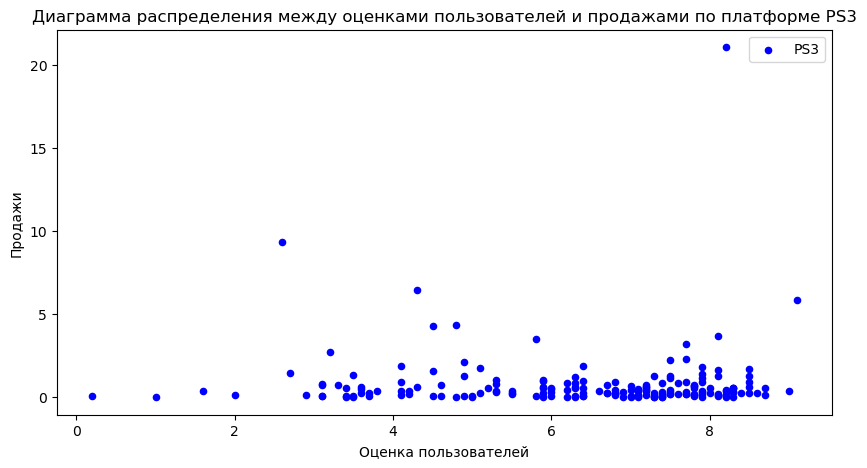

Корреляция между оценками пользователей и продажами по платформе XOne = -0.06892505319711213


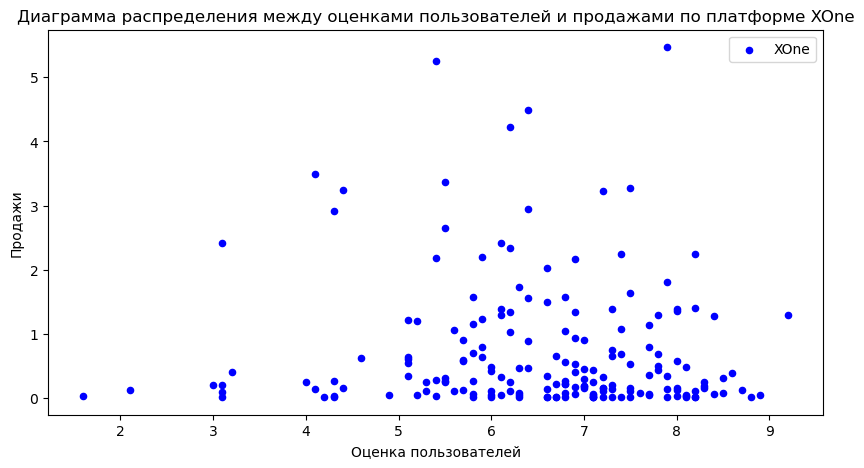

Корреляция между оценками пользователей и продажами по платформе 3DS = 0.24150410134889125


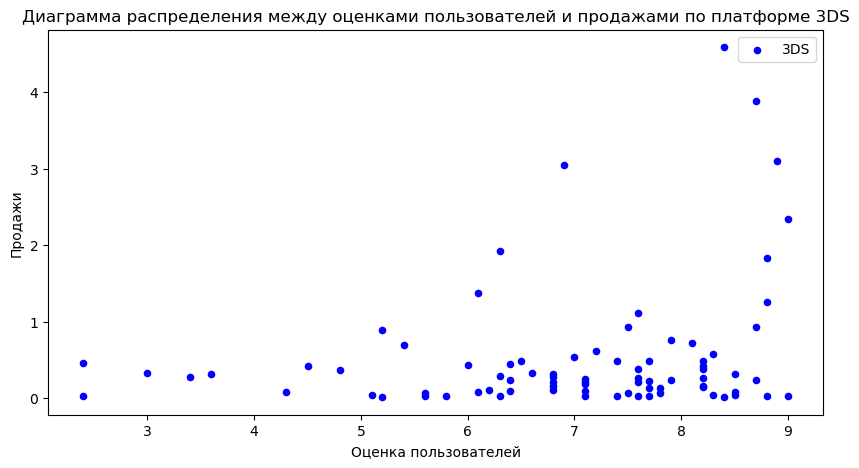

Корреляция между оценками пользователей и продажами по платформе X360 = -0.011742173023024492


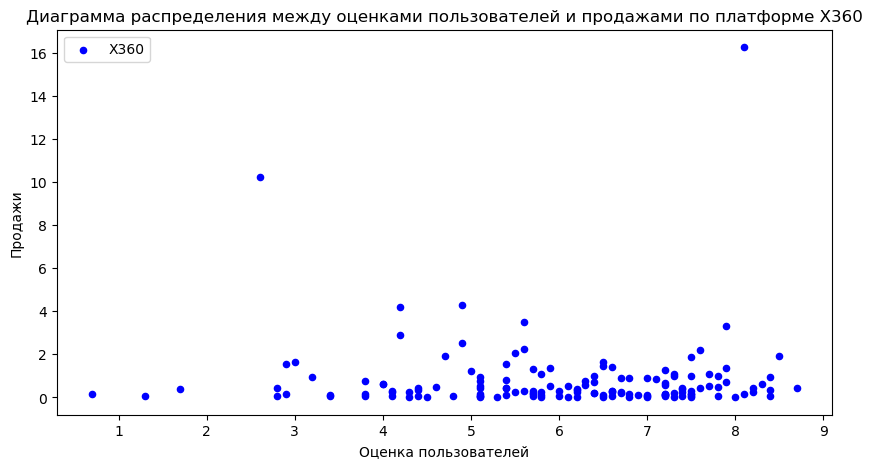

In [117]:
for platform in top_5_platforms:
    platform_data = actual_data.query('platform == @platform and user_score > -1')
    
    platform_data.plot( #построение диаграммы рассеяния
        x='user_score', 
        y='total_sales', 
        kind='scatter', 
        figsize=(10, 5), 
        color='blue',
        title=f'Диаграмма распределения между оценками пользователей и продажами по платформе {platform}',
        xlabel='Оценка пользователей',
        ylabel='Продажи')
    
    
    correlation = platform_data['user_score'].corr(platform_data['total_sales']) #расчёт корреляции между оценками пользователей и продажами
    print(f'Корреляция между оценками пользователей и продажами по платформе {platform} =', correlation)
    
    # Показ графика
    plt.legend([platform])
    plt.show()


*Диаграммы распределения между оценками пользователя и продажами каждой из платформ совместно с rорреляционным анализом говорят о том, что связь очень слабая (её почти нет). Так значения корреляции расположились в отрезке от -0.03195710900518829 у платформы **PS4** и до 0.24150410134889125 у платформы **3DS***

*Для критиков*

Корреляция между оценками критиков и продажами по платформе PS4 = 0.40656790206178123


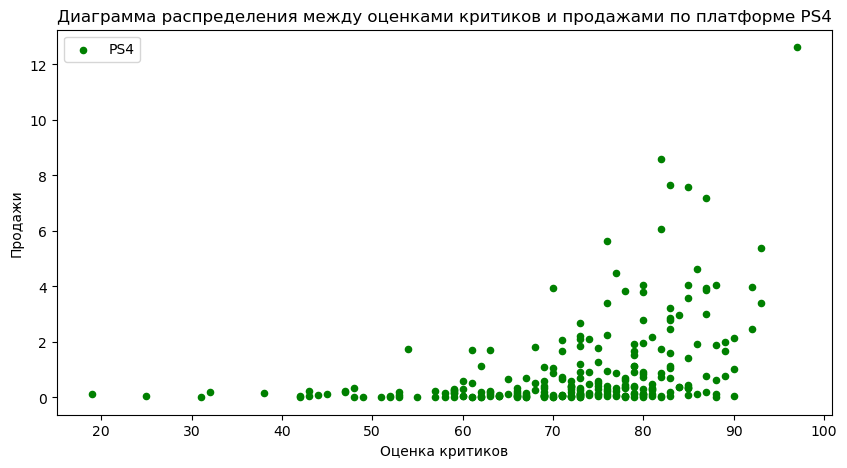

Корреляция между оценками критиков и продажами по платформе PS3 = 0.33428533933719184


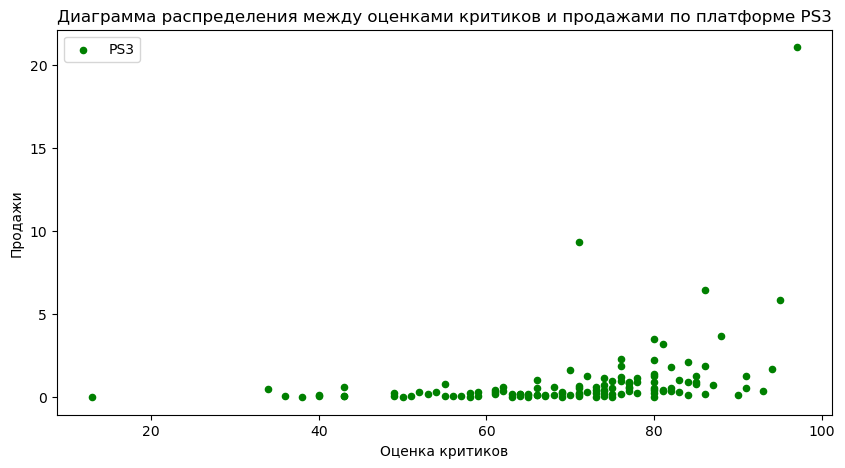

Корреляция между оценками критиков и продажами по платформе XOne = 0.41699832800840153


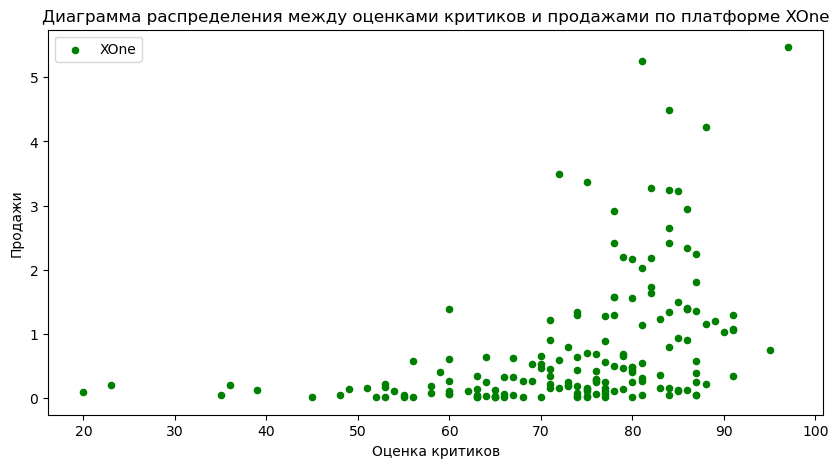

Корреляция между оценками критиков и продажами по платформе 3DS = 0.3570566142288104


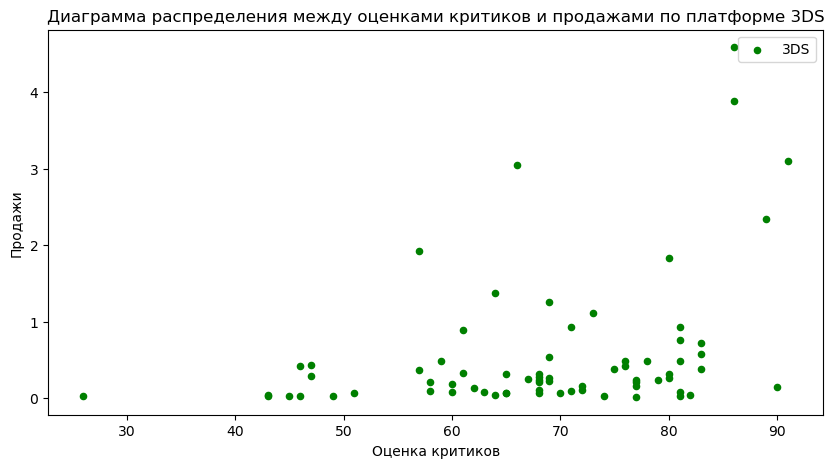

Корреляция между оценками критиков и продажами по платформе X360 = 0.35034454602286647


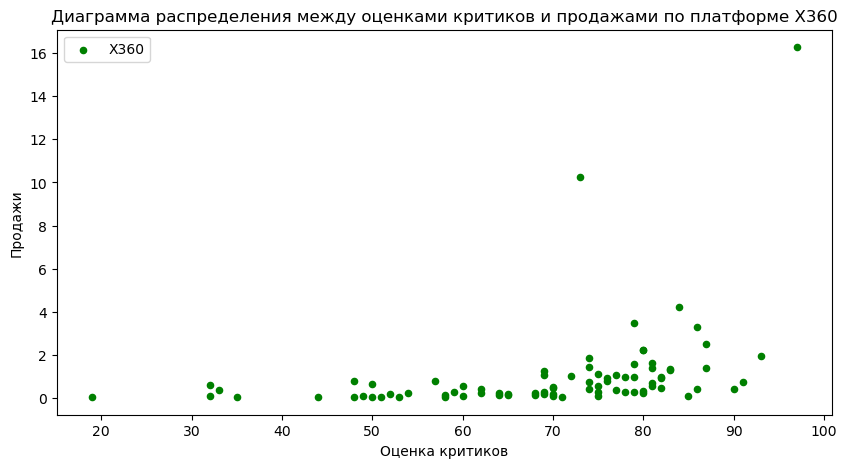

In [120]:
for platform in top_5_platforms:
    platform_data = actual_data.query('platform == @platform and critic_score > -1')
    
    platform_data.plot( #Построение диаграммы рассеяния
        x='critic_score', 
        y='total_sales', 
        kind='scatter', 
        figsize=(10, 5), 
        color='green',
        title=f'Диаграмма распределения между оценками критиков и продажами по платформе {platform}',
        xlabel='Оценка критиков',
        ylabel='Продажи'
    )
    
    #расчёт корреляции между оценками критиков и продажами
    correlation = platform_data['critic_score'].corr(platform_data['total_sales'])
    print(f'Корреляция между оценками критиков и продажами по платформе {platform} =', correlation)
    
    
    plt.legend([platform])
    plt.show()


*Диаграммы распределения между оценками критиков и продажами каждой из платформ совместно с корреляционным анализом говорят о том, что связь умеренно сильная (не достигает больших значений, но и не так сильно мала в сравнении с пользователями). Так значения корреляции расположились в отрезке от 0.33428533933719184 у платформы **PS3** и до 0.41699832800840153 у платформы **XOne***

##### Выводы по исследованию о влиянии отзывов пользователей и критиков на продажи внутри одной популярной платформы
*Диаграммы распределения между оценками пользователя и продажами каждой из платформ совместно с rорреляционным анализом говорят о том, что связь очень слабая (её почти нет). Так значения корреляции расположились в отрезке от -0.03195710900518829 у платформы **PS4** и до 0.24150410134889125 у платформы **3DS*** <br>
*Диаграммы распределения между оценками критиков и продажами каждой из платформ совместно с корреляционным анализом говорят о том, что связь умеренно сильная (не достигает больших значений, но и не так сильно мала в сравнении с пользователями). Так значения корреляции расположились в отрезке от 0.33428533933719184 у платформы **PS3** и до 0.41699832800840153 у платформы **XOne***

*Далее рассмотрим корреляционную связь не внутри одной популярной группы, а среди всех актуальных групп*

Корреляция между оценками пользователей и продажами = -0.0026078138278985293


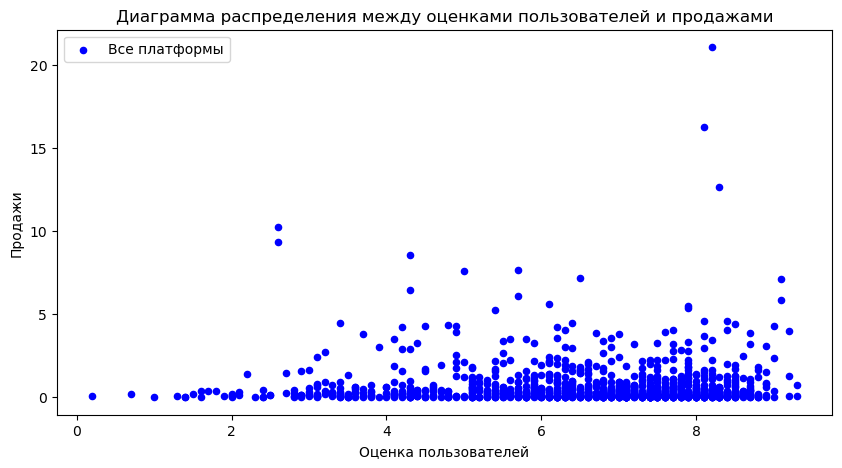

In [124]:
valid_user_score_data = actual_data.query('user_score > -1') #выделение группы оценки пользователей

valid_user_score_data.plot( #построение диаграммы рассеяния для всех данных
    x='user_score', 
    y='total_sales', 
    kind='scatter', 
    figsize=(10, 5), 
    color='blue',
    title='Диаграмма распределения между оценками пользователей и продажами',
    xlabel='Оценка пользователей',
    ylabel='Продажи'
)

correlation = valid_user_score_data['user_score'].corr(valid_user_score_data['total_sales']) #расчёт корреляции между оценками пользователей и продажами
print('Корреляция между оценками пользователей и продажами =', correlation)

plt.legend(['Все платформы'])
plt.show()

In [125]:
actual_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,grand theft auto v,PS3,2013,action,7.02,9.09,0.98,3.96,97,8.2,m,21.05
1,grand theft auto v,X360,2013,action,9.66,5.14,0.06,1.41,97,8.1,m,16.27
2,call of duty: black ops 3,PS4,2015,shooter,6.03,5.86,0.36,2.38,-1,-1.0,unknown,14.63
3,pokemon x/pokemon y,3DS,2013,role-playing,5.28,4.19,4.35,0.78,-1,-1.0,unknown,14.60
4,grand theft auto v,PS4,2014,action,3.96,6.31,0.38,1.97,97,8.3,m,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
2228,strawberry nauts,PSV,2016,adventure,0.00,0.00,0.01,0.00,-1,-1.0,unknown,0.01
2229,aiyoku no eustia,PSV,2014,misc,0.00,0.00,0.01,0.00,-1,-1.0,unknown,0.01
2230,samurai warriors: sanada maru,PS3,2016,action,0.00,0.00,0.01,0.00,-1,-1.0,unknown,0.01
2231,haitaka no psychedelica,PSV,2016,adventure,0.00,0.00,0.01,0.00,-1,-1.0,unknown,0.01


Корреляция между оценками пользователей и продажами = 0.19392946476545972


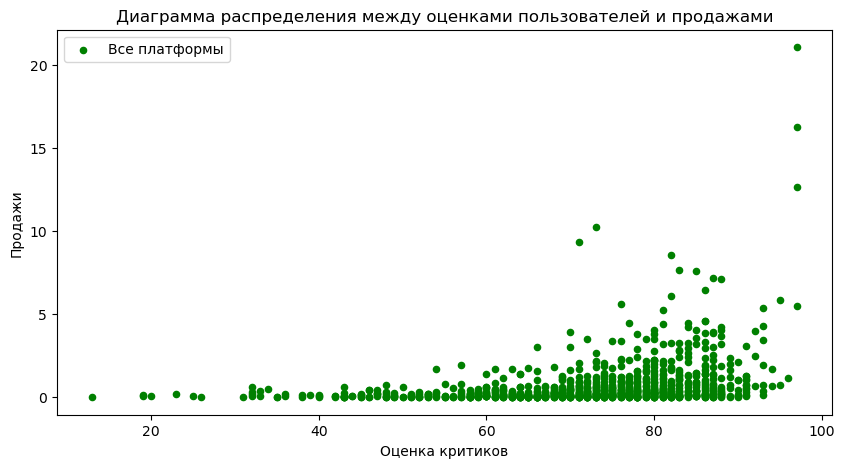

In [126]:
valid_critic_score_data = actual_data[actual_data['critic_score'] > -1] #выделение группы оценки критиков

valid_critic_score_data.plot( #построение диаграммы рассеяния для всех данных
    x='critic_score', 
    y='total_sales', 
    kind='scatter', 
    figsize=(10, 5), 
    color='green',
    title='Диаграмма распределения между оценками пользователей и продажами',
    xlabel='Оценка критиков',
    ylabel='Продажи'
)

correlation = valid_user_score_data['critic_score'].corr(valid_user_score_data['total_sales']) #расчёт корреляции между оценками пользователей и продажами
print('Корреляция между оценками пользователей и продажами =', correlation)

plt.legend(['Все платформы'])
plt.show()

##### Выводы по исследованию о влиянии отзывов пользователей и критиков на продажи внутри всех платформ
Корреляция между оценками пользователей и продажами = **-0.0026078138278985293**, что указывает на очень слабую связь, а точнее её отсутствие, в то время как у критиков связь сильнее, но достигает уровня умеренно сильной (Корреляция между оценками пользователей и продажами = **0.19392946476545972**)

##### Общий вывод на Исследование о влиянии отзывов пользователей и критиков на продажи
###### Выводы по исследованию о влиянии отзывов пользователей и критиков на продажи внутри одной популярной платформы
*Диаграммы распределения между оценками пользователя и продажами каждой из платформ совместно с rорреляционным анализом говорят о том, что связь очень слабая (её почти нет). Так значения корреляции расположились в отрезке от -0.03195710900518829 у платформы **PS4** и до 0.24150410134889125 у платформы **3DS*** <br>
*Диаграммы распределения между оценками критиков и продажами каждой из платформ совместно с корреляционным анализом говорят о том, что связь умеренно сильная (не достигает больших значений, но и не так сильно мала в сравнении с пользователями). Так значения корреляции расположились в отрезке от 0.33428533933719184 у платформы **PS3** и до 0.41699832800840153 у платформы **XOne*** 
###### Выводы по исследованию о влиянии отзывов пользователей и критиков на продажи внутри всех платформ
*Корреляция между оценками пользователей и продажами = **-0.0026078138278985293**, что указывает на очень слабую связь, а точнее её отсутствие, в то время как у критиков связь сильнее, но достигает уровня умеренно сильной (Корреляция между оценками пользователей и продажами = **0.19392946476545972**)*

#### Исследование Общего распределение игр по жанрам

*Для начала получим данные по жанрам и их суммарным продажам, чтобы определить популярные группы*

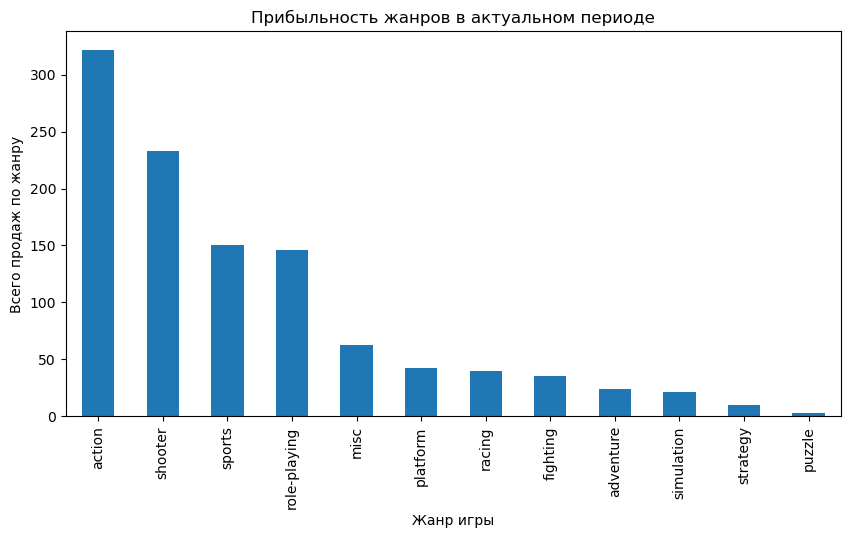

In [131]:
genre_sales = (actual_data.groupby('genre')['total_sales'].sum()
               .sort_values(ascending=False))

genre_sales.plot( #построение столбчатой диаграммы
    kind='bar', 
    figsize=(10, 5), 
    title='Прибыльность жанров в актуальном периоде')
plt.xlabel('Жанр игры')
plt.ylabel('Всего продаж по жанру')
plt.show()

*Построим диаграмму размаха, дабы определить самые востребованные жанры*

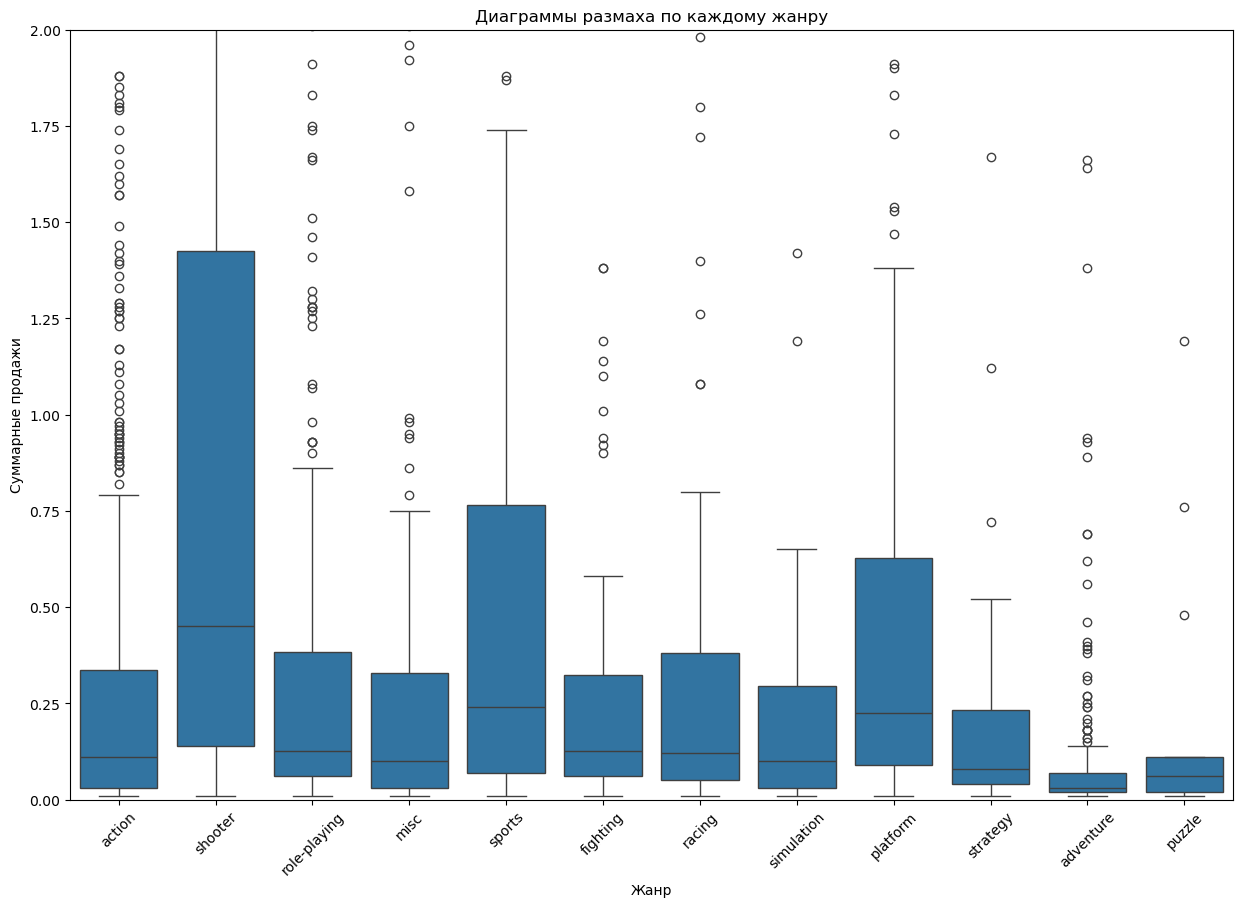

In [133]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='genre', y='total_sales', data=actual_data).set(ylim=(0,2))
plt.title('Диаграммы размаха по каждому жанру')
plt.xlabel('Жанр')
plt.ylabel('Суммарные продажи')
plt.xticks(rotation=45)
plt.show()

*По таблице **boxplot** видно, что медианное значение суммы продаж выше у **shooter**, **sports** и **platform***. Убедимся в этом, показав таблицу с медианным значением суммарных продаж

In [135]:
genre_median_sales  = actual_data.groupby('genre')['total_sales'].median().reset_index()
genre_median_sales.columns = ['genre', 'median_sales']
genre_median_sales.sort_values(by='median_sales', ascending=False).head()

,genre,median_sales
8,shooter,0.450
10,sports,0.240
4,platform,0.225
7,role-playing,0.125
2,fighting,0.125


##### Вывод по Исследованию общего распределение игр по жанрам
В ходе данного шага были получены данные по жанрам и их суммарным продажам, затем построена диаграмма размаха, дабы определить самые востребованные жанры. По таблице **boxplot** было видно, что медианное значение суммы продаж выше у **shooter, sports** и **platform** – мы убедились в этом, показав таблицу с медианным значением суммарных продаж, где медианное значение **shooter** = 450, **sports** = 240 и **platform** = 225. Другие жанры имеют большой скачок вниз, поэтому уже не прибыльны (например, разница **role-playing** с **platform** равна **100**)

### Вывод по Исседовательскому анализу данных
На данном этапе было проведено сразу несколько исследований, направленных на изучение информации датасета и играх. Более подробная информация представлена ниже:
##### Вывод по Исследованию выпуска игр в разные годы
Исследование показало, что 2008 и 2009 года имеют наибольшее количество выпущенных игр, которое достигает примерно 1427 штук. Данные таблицы важны для каждого периода из-за того, что сама диаграмма имеет волнообразный пик (идёт не постоянное нарастание количества значений, а они то убывают, то возрастают) 
##### Вывод по Исследованию продаж по платформам
Исходя из сводной таблицы и **"Столбчатой диаграммы зависимости суммы продаж по разным платформам** видно, что наибольшая сумма продаж представлена у 6 фирм. Больше 6 брать не стоит, тк разрыв между значениями будет слишком большой. Далее был построен график, показывающий **"Продажи по годам для топ платформ"**. Судя по графику, видно, что платформа **"DS"** охватывает слишком длинный период. Проверили эту платформу. Исходя из таблицы, можно сделать вывод, что платформа **DS** встречается до 2004 года только один раз – в 1985 году – это строка с индексом 15957. Скорее всего, она была добавлена случайно, тк это значение встречается только один раз, поэтому мы можем её удалить. Была удалена одна строка и перерисован график, после чего найден **срок жизненного цикла платформ** путём медианного значения разницы размаха лет существования – **он равен 11 лет**. Теперь определим актуальный период. Соглсано практике, в традиционных бизнесах редко берут данные более чем за 2-3 года. А в такой динамично меняющейся индустрии, как компьютерные игры и вовсе не стоит брать слишком большой временной интервал - иначе обязательно можно захватить уже отжившие тренды. Но и слишком короткий период тоже брать не стоит. Именно поэтому оптимальным **актуальным периодом** является срок **2-3 года**
##### Вывод по Исследованию лидирующих по продажам платформ
В процессе данного исследования было отобрано 10 актуальных платформ, после чего был выведен датафрейм с данными платформ за актуальный период, далее был построен линейный график **"Жизненный цикл всех платформ за актуальный период"**, согласно которому наиболее прибыльными кажутся платформы **PS4** и **XOne**
##### Вывод по Boxplot по глобальным продажам игр в разбивке по платформам
У каждой платформы присутствуют выбросы,что говорит о том, что есть игры, которые значительно превосходят по продажам другие игры на тех же платформах. Например, на платформе PS3 есть игры с продажами более 20 миллионов
##### Общий вывод на Исследование о влиянии отзывов пользователей и критиков на продажи
###### Выводы по исследованию о влиянии отзывов пользователей и критиков на продажи внутри одной популярной платформы
*Диаграммы распределения между оценками пользователя и продажами каждой из платформ совместно с rорреляционным анализом говорят о том, что связь очень слабая (её почти нет). Так значения корреляции расположились в отрезке от -0.03195710900518829 у платформы **PS4** и до 0.24150410134889125 у платформы **3DS*** <br>
*Диаграммы распределения между оценками критиков и продажами каждой из платформ совместно с корреляционным анализом говорят о том, что связь умеренно сильная (не достигает больших значений, но и не так сильно мала в сравнении с пользователями). Так значения корреляции расположились в отрезке от 0.33428533933719184 у платформы **PS3** и до 0.41699832800840153 у платформы **XOne*** 
###### Выводы по исследованию о влиянии отзывов пользователей и критиков на продажи внутри всех платформ
*Корреляция между оценками пользователей и продажами = **-0.0026078138278985293**, что указывает на очень слабую связь, а точнее её отсутствие, в то время как у критиков связь сильнее, но достигает уровня умеренно сильной (Корреляция между оценками пользователей и продажами = **0.19392946476545972**)*
##### Вывод по Исследованию общего распределение игр по жанрам
В ходе данного шага были получены данные по жанрам и их суммарным продажам, затем построена диаграмма размаха, дабы определить самые востребованные жанры. По таблице **boxplot** было видно, что медианное значение суммы продаж выше у **shooter, sports** и **platform** – мы убедились в этом, показав таблицу с медианным значением суммарных продаж, где медианное значение **shooter** = 450, **sports** = 240 и **platform** = 225. Другие жанры имеют большой скачок вниз, поэтому уже не прибыльны (например, разница **role-playing** с **platform** равна **100**)

### Составление портрета пользователя каждого региона

#### Самые популярные платформы (топ-5) по регионам
*Создадим отдельный датасет, в котором выведем название платформы и сумму продаж по каждой платформе. Выполним это для наших топ-5 платформ, а оставшиеся поместим в отдельную подназванием "other", чтобы не откидывать их в процессе анализа и не искажать представления об изначальном датасете*

*Продажи в Северной Америке (**na**):*

In [141]:
na = actual_data.groupby('platform')['na_sales'].sum().sort_values(ascending=False).reset_index()
na.loc[5:, 'platform'] = 'Other'
na.loc[5, 'na_sales'] = na.loc[5:, 'na_sales'].sum().round(2)
na = na.iloc[0:6, :]
na

,platform,na_sales
0,PS4,108.74
1,XOne,93.12
2,X360,81.66
3,PS3,63.50
4,3DS,38.20
5,Other,52.49


*Продажи в Европе (**eu**):*

In [143]:
eu = actual_data.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).reset_index()
eu.loc[5:, 'platform'] = 'Other'
eu.loc[5, 'eu_sales'] = eu.loc[5:, 'eu_sales'].sum().round(2)
eu = eu.iloc[0:6, :]
eu

,platform,eu_sales
0,PS4,141.09
1,PS3,67.81
2,XOne,51.59
3,X360,42.52
4,3DS,30.96
5,Other,58.26


*Продажи в Японии (**jp**):*

In [145]:
jp = actual_data.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).reset_index()
jp.loc[5:, 'platform'] = 'Other'
jp.loc[5, 'jp_sales'] = jp.loc[5:, 'jp_sales'].sum().round(2)
jp = jp.iloc[0:6, :]
jp

,platform,jp_sales
0,3DS,67.81
1,PS3,23.35
2,PSV,18.59
3,PS4,15.96
4,WiiU,10.88
5,Other,4.19


*Объединим три датасета в один **new***

In [147]:
new = pd.merge(na, eu, left_index=True, right_index=True)
new = pd.merge(new, jp, left_index=True, right_index=True)
new.rename(columns={'platform_x': 'na_platform', 'platform_y': 'eu_platform', 'platform': 'jp_platform'}, inplace=True)
new

,na_platform,na_sales,eu_platform,eu_sales,jp_platform,jp_sales
0,PS4,108.74,PS4,141.09,3DS,67.81
1,XOne,93.12,PS3,67.81,PS3,23.35
2,X360,81.66,XOne,51.59,PSV,18.59
3,PS3,63.50,X360,42.52,PS4,15.96
4,3DS,38.20,3DS,30.96,WiiU,10.88
5,Other,52.49,Other,58.26,Other,4.19


*Визуализируем данные, покажем по долям каждую платформу на круговой диаграмме*

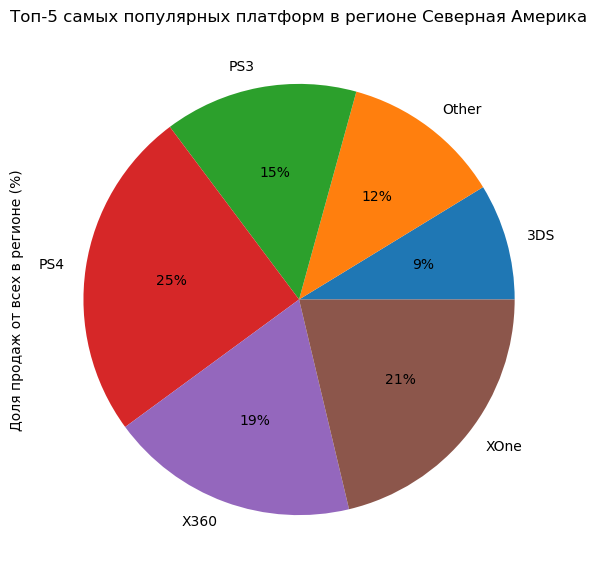

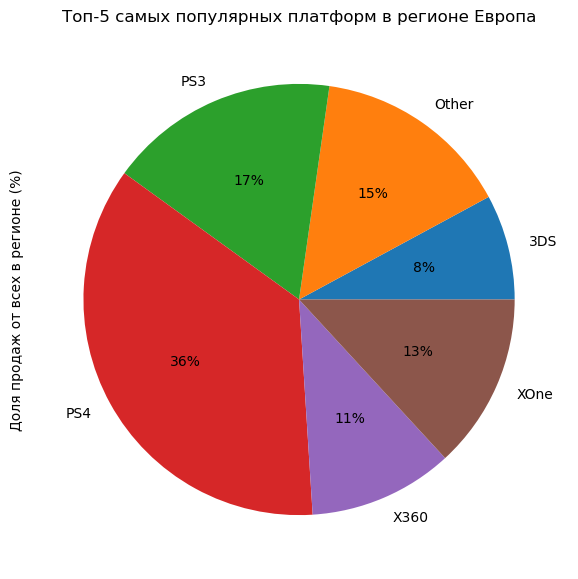

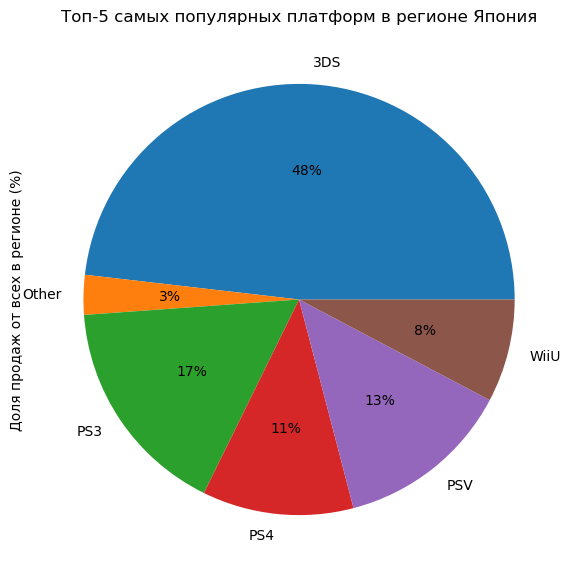

In [149]:
regions = pd.DataFrame({ 
    'region': ['Северная Америка', 'Европа', 'Япония'],
    'platform': ['na_platform', 'eu_platform', 'jp_platform'],      #создание списка регионов и их названий
    'sales': ['na_sales', 'eu_sales', 'jp_sales']
})


for i in regions.index:
    region_name = regions.loc[i, 'region']
    platform_col = regions.loc[i, 'platform']      #построение круговых диаграмм для каждого региона в цикле
    sales_col = regions.loc[i, 'sales']
    
    region_data = new.groupby(platform_col)[sales_col].sum()     #группировка и суммирование
    
    plt.figure(figsize=(7, 7))
    region_data.plot(kind='pie', autopct='%1.0f%%', legend=False)
    plt.ylabel('Доля продаж от всех в регионе (%)')
    plt.title(f'Топ-5 самых популярных платформ в регионе {region_name}')     #построение круговой диаграммы
    plt.show()


*Найдем доли продаж в каждом регионе*

In [151]:
new['na_sales_proc'] = (new['na_sales'] / new['na_sales'].sum() * 100).round(2)
new['eu_sales_proc'] = (new['eu_sales'] / new['eu_sales'].sum() * 100).round(2)
new['jp_sales_proc'] = (new['jp_sales'] / new['jp_sales'].sum() * 100).round(2)
new

,na_platform,na_sales,eu_platform,eu_sales,jp_platform,jp_sales,na_sales_proc,eu_sales_proc,jp_sales_proc
0,PS4,108.74,PS4,141.09,3DS,67.81,24.84,35.97,48.17
1,XOne,93.12,PS3,67.81,PS3,23.35,21.27,17.29,16.59
2,X360,81.66,XOne,51.59,PSV,18.59,18.66,13.15,13.21
3,PS3,63.50,X360,42.52,PS4,15.96,14.51,10.84,11.34
4,3DS,38.20,3DS,30.96,WiiU,10.88,8.73,7.89,7.73
5,Other,52.49,Other,58.26,Other,4.19,11.99,14.85,2.98


##### Вывод по составлению портера Самые популярные платформы (топ-5) по регионам
Был создан отдельный датасет путём слияния трёх датасетов, в котором было выведено название платформы и сумма продаж по каждой платформе. Выполнено это для топ-5 платформ, а оставшиеся помещены в отдельную под названием "other", чтобы не откидывать их в процессе анализа и не искажать представления об изначальном датасете. Далее с помощью цткла были визуализированы данные, показана по доля каждой платформы на круговой диаграмме в процентах, а также выведена на экран вся таблица в абсолютных и относительных значениях. На этой таблице видно, например, что наибольшую относительную часть в Северной Америке (**"na"**) занимает платформа **PS4** с процентной долей **24.84%** – и так можно рассмотреть данные для любой платформы и региона (в этом датасете описаны различия в долях продаж)

#### Самые популярные жанры (топ-5) по регионам
*Создадим отдельный датасет, в котором выведем название жанра и сумму продаж по каждому жанру. Выполним это для наших топ-5 платформ, а оставшиеся поместим в отдельную подназванием "other", чтобы не откидывать их в процессе анализа и не искажать представления об изначальном датасете*

In [154]:
#делаем то же самое, что и делали раньше, только теперь применяем к столбцу genre

#анализ продаж по жанрам в Северной Америке
na_genre = actual_data.groupby('genre')['na_sales'].sum().sort_values(ascending=False).reset_index()
na_genre.loc[5:, 'genre'] = 'Other'
na_genre.loc[5, 'na_sales'] = na_genre.loc[5:, 'na_sales'].sum().round(2)
na_genre = na_genre.iloc[0:6, :]

#анализ продаж по жанрам в Европе
eu_genre = actual_data.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).reset_index()
eu_genre.loc[5:, 'genre'] = 'Other'
eu_genre.loc[5, 'eu_sales'] = eu_genre.loc[5:, 'eu_sales'].sum().round(2)
eu_genre = eu_genre.iloc[0:6, :]

#анализ продаж по жанрам в регионе Япония
jp_genre = actual_data.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).reset_index()
jp_genre.loc[5:, 'genre'] = 'Other'
jp_genre.loc[5, 'jp_sales'] = jp_genre.loc[5:, 'jp_sales'].sum().round(2)
jp_genre = jp_genre.iloc[0:6, :]

#объединение данных по регионам
genre_sales = pd.merge(na_genre, eu_genre, left_index=True, right_index=True)
genre_sales = pd.merge(genre_sales, jp_genre, left_index=True, right_index=True)
genre_sales.rename(columns={'genre_x': 'na_genre', 'genre_y': 'eu_genre', 'genre': 'jp_genre'}, inplace=True)
genre_sales

,na_genre,na_sales,eu_genre,eu_sales,jp_genre,jp_sales
0,action,126.05,action,118.13,role-playing,51.04
1,shooter,109.74,shooter,87.86,action,40.49
2,sports,65.27,sports,60.52,misc,9.20
3,role-playing,46.40,role-playing,36.97,fighting,7.65
4,misc,27.49,racing,20.19,shooter,6.61
5,Other,62.76,Other,68.56,Other,25.79


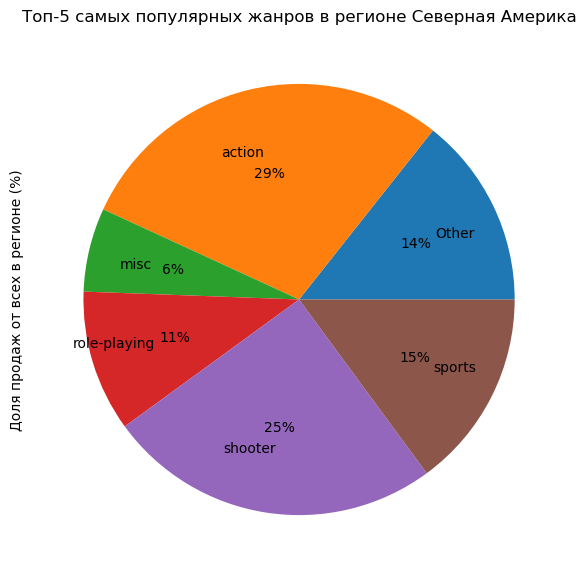

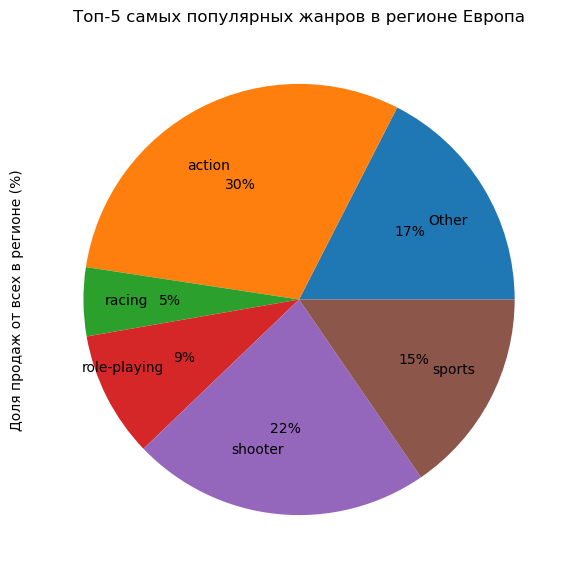

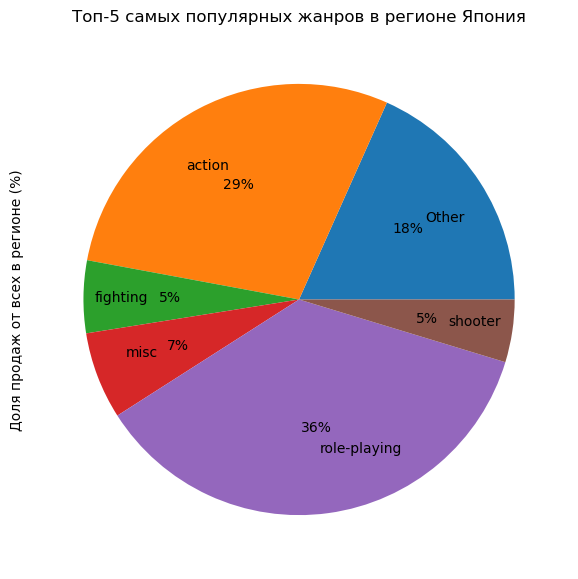

In [155]:
for i, region in enumerate(['na_sales', 'eu_sales', 'jp_sales']):
    region_name = ['Северная Америка', 'Европа', 'Япония'][i]
    genre_col = ['na_genre', 'eu_genre', 'jp_genre'][i]
    
    region_data = genre_sales.groupby(genre_col)[region].sum() #группировка и суммирование данных по жанрам
    
    plt.figure(figsize=(7, 7)) #построение круговой диаграммы
    region_data.plot(kind='pie', autopct='%1.0f%%', legend=False, labeldistance=0.7)
    plt.ylabel('Доля продаж от всех в регионе (%)')
    plt.title(f'Топ-5 самых популярных жанров в регионе {region_name}')
    plt.show()

In [156]:
#датасет с долями продаж
genre_sales['na_sales_proc'] = (genre_sales['na_sales'] / genre_sales['na_sales'].sum() * 100).round(2)
genre_sales['eu_sales_proc'] = (genre_sales['eu_sales'] / genre_sales['eu_sales'].sum() * 100).round(2)
genre_sales['jp_sales_proc'] = (genre_sales['jp_sales'] / genre_sales['jp_sales'].sum() * 100).round(2)
genre_sales

,na_genre,na_sales,eu_genre,eu_sales,jp_genre,jp_sales,na_sales_proc,eu_sales_proc,jp_sales_proc
0,action,126.05,action,118.13,role-playing,51.04,28.80,30.12,36.26
1,shooter,109.74,shooter,87.86,action,40.49,25.07,22.40,28.76
2,sports,65.27,sports,60.52,misc,9.20,14.91,15.43,6.54
3,role-playing,46.40,role-playing,36.97,fighting,7.65,10.60,9.43,5.43
4,misc,27.49,racing,20.19,shooter,6.61,6.28,5.15,4.70
5,Other,62.76,Other,68.56,Other,25.79,14.34,17.48,18.32


##### Вывод по составлению портера Самые популярные платформы (топ-5) по регионам
Был создан отдельный датасет путём слияния трёх датасетов, в котором было выведено название жанра и сумма продаж по каждому жанру. Выполнено это для топ-5 жанров, а оставшиеся помещены в отдельную под названием "other", чтобы не откидывать их в процессе анализа и не искажать представления об изначальном датасете. Далее с помощью цикла были визуализированы данные, показана по долям каждого жанра на круговой диаграмме в процентах, а также выведена на экран вся таблица в абсолютных и относительных значениях. На этой таблице видно, например, что наибольшую относительную часть в Европе (**"eu"**) занимает жанр **action** с процентной долей рынка **30.12%** – и так можно рассмотреть данные для любого жанра и региона (в этом датасете описаны различия в долях продаж). Разница в долях связана с предпочтением людей в выборе жанра игр: кому-то нравится экшн, а кому-то спортивная тематика

#### Влияние рейтинга ESRB на продажи в отдельном регионе

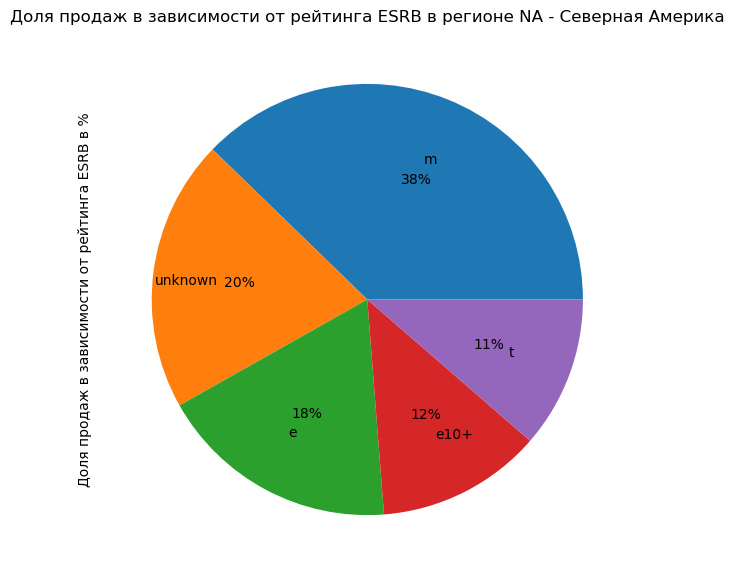

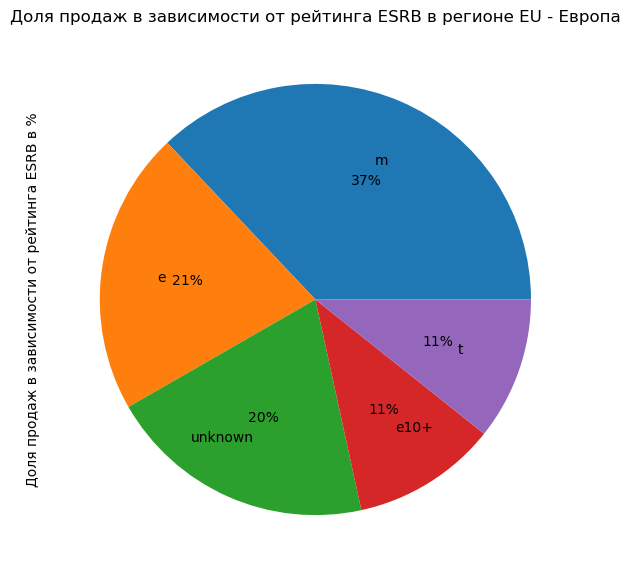

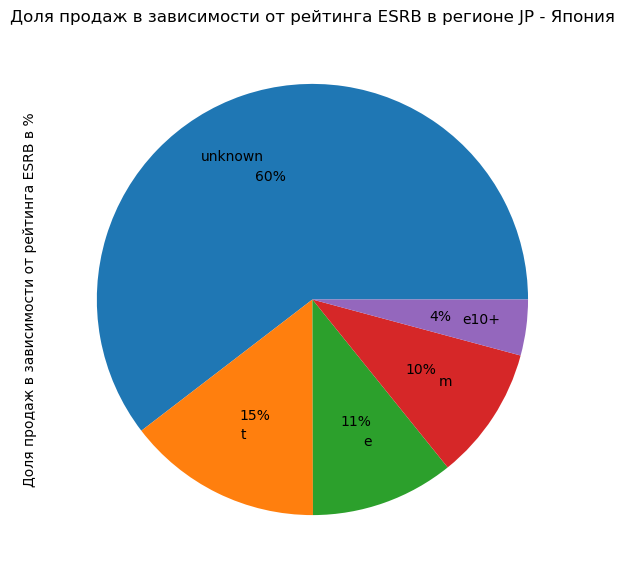

In [159]:
regions = ['na_sales', 'eu_sales', 'jp_sales'] 
region_names = {'na_sales': 'NA - Северная Америка', 'eu_sales': 'EU - Европа', 'jp_sales': 'JP - Япония'} #создание словаря с названиями регионов

for region in regions: #создание цикла для каждого региона
    region_name = region_names[region]
    esrb_sales = actual_data.groupby('rating')[region].sum().sort_values(ascending=False) #суммирование продаж по рейтингу ESRB для каждого региона
    
    plt.figure(figsize=(7, 7)) #построение круговой диаграммы
    esrb_sales.plot(kind='pie', autopct='%1.0f%%', legend=False, labeldistance=0.7)
    plt.ylabel('Доля продаж в зависимости от рейтинга ESRB в %')
    plt.title(f'Доля продаж в зависимости от рейтинга ESRB в регионе {region_name}')
    plt.show()


##### Вывод на влияние рейтинга ESRB на продажи в отдельном регионе
Рейтинг ESRB влияет на продажи в отдельном регионе. В каждом регионе доминирует в зависимости от доли продаж свой определённый рейтинг ESRB. Так, например, в регионе **"Северная Америка"** доминирует рейтинг **"m"** с долей в **38%**, в **Европе** – рейтинг **"m"** с долей в **37%**, а в **Японии** – рейтинг с долей в **60%**, значения которого были пропущены и мы в самом начале в Предобработке данных заменили на **unknown**

### Вывод по составлению портрета пользователя каждого региона
В ходе данного этапа были определены самые популярные платформы (топ-5), показаны на круговой диаграмме процентное соотношение, описаны числовые различия в долях продаж в отедльной таблицк с абсолютными и относительными значениями; определены самые популярные жанры (топ-5), по аналогии с топ-5 популярных платформ проведен анализ и пояснена разница в предпочтениях жанров; было выявлено, влияет ли рейтинг ESRB на продажи в отдельном регионе. Более подробные выводы представлены ниже: 
##### Вывод по составлению портера Самые популярные платформы (топ-5) по регионам
Был создан отдельный датасет путём слияния трёх датасетов, в котором было выведено название платформы и сумма продаж по каждой платформе. Выполнено это для топ-5 платформ, а оставшиеся помещены в отдельную под названием "other", чтобы не откидывать их в процессе анализа и не искажать представления об изначальном датасете. Далее с помощью цткла были визуализированы данные, показана по доля каждой платформы на круговой диаграмме в процентах, а также выведена на экран вся таблица в абсолютных и относительных значениях. На этой таблице видно, например, что наибольшую относительную часть в Северной Америке (**"na"**) занимает платформа **PS4** с процентной долей **24.84%** – и так можно рассмотреть данные для любой платформы и региона (в этом датасете описаны различия в долях продаж)
##### Вывод по составлению портера Самые популярные платформы (топ-5) по регионам
Был создан отдельный датасет путём слияния трёх датасетов, в котором было выведено название жанра и сумма продаж по каждому жанру. Выполнено это для топ-5 жанров, а оставшиеся помещены в отдельную под названием "other", чтобы не откидывать их в процессе анализа и не искажать представления об изначальном датасете. Далее с помощью цикла были визуализированы данные, показана по долям каждого жанра на круговой диаграмме в процентах, а также выведена на экран вся таблица в абсолютных и относительных значениях. На этой таблице видно, например, что наибольшую относительную часть в Европе (**"eu"**) занимает жанр **action** с процентной долей рынка **30.12%** – и так можно рассмотреть данные для любого жанра и региона (в этом датасете описаны различия в долях продаж). Разница в долях связана с предпочтением людей в выборе жанра игр: кому-то нравится экшн, а кому-то спортивная тематика
##### Вывод на влияние рейтинга ESRB на продажи в отдельном регионе
Рейтинг ESRB влияет на продажи в отдельном регионе. В каждом регионе доминирует в зависимости от доли продаж свой определённый рейтинг ESRB. Так, например, в регионе **"Северная Америка"** доминирует рейтинг **"m"** с долей в **38%**, в **Европе** – рейтинг **"m"** с долей в **37%**, а в **Японии** – рейтинг с долей в **60%**, значения которого были пропущены и мы в самом начале в Предобработке данных заменили на **unknown**

### Проверка гипотез

**Предисловие:** В случаях проверки гипотез ниже всегда используется двусторонняя гипотза, так как  она предполагает возможное отклонение и в большую, и в меньшую стороны. Нулевую и альтернативную гипотезу в указанных ниже случаях нужно формулировать так, чтобы использовать в нулевой гипотезе знак равенства. Это делается для того, чтобы нулевая гипотеза выглядела определённо и точно, была проста в интерпретации, а также это полезно, чтобы зафиксировать параметр генеральной совокупности и построить распределение

#### Гипотеза о равенстве средних пользовательских рейтингов платформ **Xbox One** и **PC**
Необходимо выдвинуть нулевую и альтернативную гипотезу: <br>
**H0:** Пользовательские рейтинги платформ **Xbox One** и **PC** равны <br>
**H1:** Пользовательские рейтинги платформ **Xbox One** и **PC** не равны <br>
Перейдём к проверке нулевой гипотезы

*Так как мы проверяем две разные выборки, необходимо проверить, равны ли дисперсии между собой*

In [166]:
xbox = actual_data.loc[(actual_data['platform'] == 'XOne') & (actual_data['user_score'] > -1), 'user_score']
xbox.describe() #описательная статистика

count    182.000000
mean       6.521428
std        1.380941
min        1.600000
25%        5.800000
50%        6.800000
75%        7.500000
max        9.200000
Name: user_score, dtype: float64

*Стандартное отклонение – корень из дисперсии. В данной выборке **xbox** стандартное отклонение равно 1.380941*

In [168]:
pc = actual_data.loc[(actual_data['platform'] == 'PC') & (actual_data['user_score'] > -1), 'user_score']
pc.describe() #описательная статистика

count    155.000000
mean       6.269678
std        1.742381
min        1.400000
25%        5.300000
50%        6.800000
75%        7.600000
max        9.300000
Name: user_score, dtype: float64

*Стандартное отклонение – корень из дисперсии. В данной выборке **pc** стандартное отклонение равно 1.742381 <br>
СКО разное – это означает, что и дисперсии тоже разные, поэтому будем дополнительно включать **equal_var=False***

In [170]:
alpha = .05
results = st.ttest_ind(xbox, pc, equal_var=False) #автоматически будет проверено в обе стороны

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.147597032047728
Не получилось отвергнуть нулевую гипотезу


##### Вывод по гипотезе о равенстве средних пользовательских рейтингов платформ **Xbox One** и **PC**
Перед попыткой опровержения нулевой гипотезы необходимио было проверить равенство дисперсий. Как оказалось, дисперсии разные, поэтому был использован параметр **equal_var=False**. В результате при уровне значимости 5% опровергнуть нулевую гипотезу о том, что Пользовательские рейтинги платформ **Xbox One** и **PC** равны, не получилось. Значит, есть предположение, что они равны, но доказать это на 100% мы не сможем

#### Гипотеза о равенстве средних пользовательских рейтингов жанров **action** и **sports**
Необходимо выдвинуть нулевую и альтернативную гипотезу: <br>
**H0:** Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») равны <br>
**H1:** Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») равны не равны <br>
Перейдём к проверке нулевой гипотезы

*Так как мы проверяем две разные выборки, необходимо проверить, равны ли дисперсии между собой*

In [174]:
action = actual_data.loc[(actual_data['genre'] == 'action') & (actual_data['user_score'] > -1), 'user_score']
action.describe() #описательная статистика

count    389.000000
mean       6.837532
std        1.330173
min        2.000000
25%        6.300000
50%        7.100000
75%        7.800000
max        9.100000
Name: user_score, dtype: float64

*Стандартное отклонение – корень из дисперсии. В данной выборке **action** стандартное отклонение равно 1.330173*

In [176]:
sports = actual_data.loc[(actual_data['genre'] == 'sports') & (actual_data['user_score'] > -1), 'user_score']
sports.describe() #описательная статистика

count    160.000000
mean       5.238125
std        1.783427
min        0.200000
25%        4.100000
50%        5.500000
75%        6.500000
max        8.800000
Name: user_score, dtype: float64

*Стандартное отклонение – корень из дисперсии. В данной выборке **sports** стандартное отклонение равно 1.783427 <br>
СКО разное – это означает, что и дисперсии тоже разные, поэтому будем дополнительно включать **equal_var=False***

In [178]:
alpha = .05
results = st.ttest_ind(action, sports, equal_var=False) #автоматически будет проверено в обе стороны

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.4459989209941613e-20
Отвергаем нулевую гипотезу


##### Вывод по гипотезе о равенстве средних пользовательских рейтингов жанров **action** и **sports**
Перед попыткой опровержения нулевой гипотезы необходимио было проверить равенство дисперсий. Как оказалось, дисперсии разные, поэтому был использован параметр **equal_var=False**. В результате при уровне значимости 5% отвергаем нулевую гипотезу о том, что Средние пользовательские рейтинги жанров **Action** (англ. «действие», экшен-игры) и **Sports** (англ. «спортивные соревнования») равны, получилось. Значит, есть предположение, что они не равны, но доказать это на 100% мы не сможем <br>
В обоих случаях (при проверке и первой и второй гипотезы) был использован метод st.ttest_ind, так как были взяты выборки из двух разных генеральных совокупностей, которые не зависят друг от друга (две платформы или два рейтинга не зависят между собой), и их выборочные средние нормально распределены (благодаря Центральной предельной теореме)

### Вывод по Проверке гипотез
В случаях проверки гипотез выше всегда используется двусторонняя гипотза, так как  она предполагает возможное отклонение и в большую, и в меньшую стороны. Нулевую и альтернативную гипотезу в указанных выше случаях нужно формулировать так, чтобы использовать в нулевой гипотезе знак равенства. Это делается для того, чтобы нулевая гипотеза выглядела определённо и точно, была проста в интерпретации, а также это полезно, чтобы зафиксировать параметр генеральной совокупности и построить распределение
##### Вывод по гипотезе о равенстве средних пользовательских рейтингов платформ **Xbox One** и **PC**
Перед попыткой опровержения нулевой гипотезы необходимио было проверить равенство дисперсий. Как оказалось, дисперсии разные, поэтому был использован параметр **equal_var=False**. В результате при уровне значимости 5% опровергнуть нулевую гипотезу о том, что Пользовательские рейтинги платформ **Xbox One** и **PC** равны, не получилось. Значит, есть предположение, что они равны, но доказать это на 100% мы не сможем
##### Вывод по гипотезе о равенстве средних пользовательских рейтингов жанров **action** и **sports**
Перед попыткой опровержения нулевой гипотезы необходимио было проверить равенство дисперсий. Как оказалось, дисперсии разные, поэтому был использован параметр **equal_var=False**. В результате при уровне значимости 5% отвергаем нулевую гипотезу о том, что Средние пользовательские рейтинги жанров **Action** (англ. «действие», экшен-игры) и **Sports** (англ. «спортивные соревнования») равны, получилось. Значит, есть предположение, что они не равны, но доказать это на 100% мы не сможем <br>
В обоих случаях (при проверке и первой и второй гипотезы) был использован метод st.ttest_ind, так как были взяты выборки из двух разных генеральных совокупностей, которые не зависят друг от друга (две платформы или два рейтинга не зависят между собой), и их выборочные средние нормально распределены (благодаря Центральной предельной теореме)

# Общий вывод
В рамках Сборного проекта №1 было проведено Исследование интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры. Было необходимо выявить определяющие успешность игры закономерности, что позволило бы сделать ставку на потенциально популярный продукт и спланировать рекламные кампании <br>
В рамках проведённого исследования было пройдено несколько этапов: Первое знакомство с файлом, Предобработка и подготовка данных, проведение Исселдовательского анализа данных, Составление портрета пользователя каждого региона,  а также Проверка гипотез – каждый из которых предполагал в себе свои особенности и нюансы. Более подробные выводы по всему Исследованию представлены ниже: 
## Вывод по Первому знакомству с данными
Датасет **data** состоит из 16715 строк и 11 столбцов. В столбцах присутствую пропуски данных, не все столбцы имеют корректный тип данных, требуется дальнейшая Предобработка данных. Сами столбцы имеют некорректное название, явных дубликатов нет
## Вывод по Предобработке данных и подготовке данных
В рамках этапа Предобработки данных были выполненные следующие шаги: изменены названия столбцов (приведены к нижнему регистру), обработаны пропуски и объяснены причины их возникновения, преобразованы данные нужные типы, найден и удален один дубликат, а также создан отдельный столбец, в котором произведен подсчёт суммарных продаж по всем регионам. Более подробный последовательны вывод каждого шага представлен ниже:
1. Обработка пропусков
- *Столбец **"name"** обозначает название игры и имеет тип данных object. Так как мы не знаем названия двух игр в этих пропущенных значениях, и процент пропусков сильно мал (0.01%), то можно удалить строки с пропущенными значениями – это не повлияет на генеральную совокупность*
- *Столбец **"year_of_release"** обозначает год выпуска игры и имеет вещественный тип данных float64 (далее будет обработан в тип datetime). Так как мы не знаем год выпуска игр в этих пропущенных значениях, и доля пропусков сильно мала (1.6%), то можно удалить строки с пропущенными значениями – это не повлияет на генеральную совокупность*
- *Столбец **"critic_score"** обозначает оценку критиков (максимум 100) и имеет вещественный тип данных float64. Процент пропусков сильно велик (51.5%). На среднее или медианное значение заменить нельзя, так как данные не зависимы между собой (рейтинг одной игры не зависит от рейтинга другой игры). Рассмотрев уникальные значения, заменем все пропуски на "-1", так как пропущенных данных много и будем помнить об этом в будущем. Возможно, пропуски данных в данном столбце связаны с тем, что игра была плохо оценена критиками и они не поставили оценку или с ошибкой при переносе данных*
- *Столбец **"user_score"** обозначает  оценку пользователей (максимум 10) и имеет вещественный тип данных float64. Процент пропусков сильно велик (51.5%). На среднее или медианное значение заменить нельзя, так как данные не зависимы между собой (рейтинг одной игры не зависит от рейтинга другой игры). Рассмотрев уникальные значения, заменем все пропуски на "-1", так как пропущенных данных много и будем помнить об этом в будущем. Также в уникальных значениях заметна запись **"tbd"**, что означает, что оценка находится в дискуссии (To Be Discussed), то есть оценка не определена. А если она не определена, то тоже заменем её на "-1". Возможно, пропуски данных в данном столбце связаны с тем, что игра была плохо оценена критиками и они не поставили оценку или с ошибкой при переносе данных*
- *Столбец **"rating"** обозначает  рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию. Столбец имеет тип данных object. Так как мы не располагаем необходимой информацией, чтобы заполнить пропуски, можно оставить эти пропуски без изменений или заполнить их чем-то нейтральным – выберем второй путь и заполним их **"unknown"***
2. Преобразование данных в нужный тип
- *Столбец **year_of_release** (год выпуска) должен быть приведён к типу datetime, однако в дальнейшем нам понадобится только номер года, который мы можем представить в виде целого числа. Скорее всего, неправильный тип возник из-за автоматического переноса данных*
- *Столбец **"critic_score"** имел сначала вещественный тип данных float64, однако после заполнения пропусков его значения стали все целыми, поэтому столбец был переведет в целочисленный тип данных. Эксперты оценивали продукты компаний в целых числах*
- *Столбец **"user_score"** имел сначала тип данных object, однако после заполнения пропусков его значения стали все вещественными числами, поэтому столбец был переведет в вещественный тип данных float32 (float32, а не float64 – чтобы занимать меньше места). Пользователи оценивали продукты компаний в вещественных числах*
3. Поиск дубликатов <br>
*При поиске дубликатов мы учитываем только три столбца: **"name","platform", "year_of_release"**, потому что пользователи и судьи могут по-разному оценить игру, а вот название, платформа и год выпуска всегда останутся неизменными. Был произведен поиск дубликатов, однако анализ показал, что неявных дубликатов нет. Все дубликаты удалены*
4. Подсчёт суммарных продаж во всех регионах <br>
*Произведен подсчёт суммарных продаж во всех регионах путём сложения продаж со всех регионов*
## Вывод по Исседовательскому анализу данных
На данном этапе было проведено сразу несколько исследований, направленных на изучение информации датасета и играх. Более подробная информация представлена ниже:
### Вывод по Исследованию выпуска игр в разные годы
Исследование показало, что 2008 и 2009 года имеют наибольшее количество выпущенных игр, которое достигает примерно 1427 штук. Данные таблицы важны для каждого периода из-за того, что сама диаграмма имеет волнообразный пик (идёт не постоянное нарастание количества значений, а они то убывают, то возрастают) 
### Вывод по Исследованию продаж по платформам
Исходя из сводной таблицы и **"Столбчатой диаграммы зависимости суммы продаж по разным платформам** видно, что наибольшая сумма продаж представлена у 6 фирм. Больше 6 брать не стоит, тк разрыв между значениями будет слишком большой. Далее был построен график, показывающий **"Продажи по годам для топ платформ"**. Судя по графику, видно, что платформа **"DS"** охватывает слишком длинный период. Проверили эту платформу. Исходя из таблицы, можно сделать вывод, что платформа **DS** встречается до 2004 года только один раз – в 1985 году – это строка с индексом 15957. Скорее всего, она была добавлена случайно, тк это значение встречается только один раз, поэтому мы можем её удалить. Была удалена одна строка и перерисован график, после чего найден **срок жизненного цикла платформ** путём медианного значения разницы размаха лет существования – **он равен 11 лет**. Теперь определим актуальный период. Соглсано практике, в традиционных бизнесах редко берут данные более чем за 2-3 года. А в такой динамично меняющейся индустрии, как компьютерные игры и вовсе не стоит брать слишком большой временной интервал - иначе обязательно можно захватить уже отжившие тренды. Но и слишком короткий период тоже брать не стоит. Именно поэтому оптимальным **актуальным периодом** является срок **2-3 года**
### Вывод по Исследованию лидирующих по продажам платформ
В процессе данного исследования было отобрано 10 актуальных платформ, после чего был выведен датафрейм с данными платформ за актуальный период, далее был построен линейный график **"Жизненный цикл всех платформ за актуальный период"**, согласно которому наиболее прибыльными кажутся платформы **PS4** и **XOne**
### Вывод по Boxplot по глобальным продажам игр в разбивке по платформам
У каждой платформы присутствуют выбросы,что говорит о том, что есть игры, которые значительно превосходят по продажам другие игры на тех же платформах. Например, на платформе PS3 есть игры с продажами более 20 миллионов
### Общий вывод на Исследование о влиянии отзывов пользователей и критиков на продажи
#### Выводы по исследованию о влиянии отзывов пользователей и критиков на продажи внутри одной популярной платформы
*Диаграммы распределения между оценками пользователя и продажами каждой из платформ совместно с rорреляционным анализом говорят о том, что связь очень слабая (её почти нет). Так значения корреляции расположились в отрезке от -0.03195710900518829 у платформы **PS4** и до 0.24150410134889125 у платформы **3DS*** <br>
*Диаграммы распределения между оценками критиков и продажами каждой из платформ совместно с корреляционным анализом говорят о том, что связь умеренно сильная (не достигает больших значений, но и не так сильно мала в сравнении с пользователями). Так значения корреляции расположились в отрезке от 0.33428533933719184 у платформы **PS3** и до 0.41699832800840153 у платформы **XOne*** 
#### Выводы по исследованию о влиянии отзывов пользователей и критиков на продажи внутри всех платформ
*Корреляция между оценками пользователей и продажами = **-0.0026078138278985293**, что указывает на очень слабую связь, а точнее её отсутствие, в то время как у критиков связь сильнее, но достигает уровня умеренно сильной (Корреляция между оценками пользователей и продажами = **0.19392946476545972**)*
### Вывод по Исследованию общего распределение игр по жанрам
В ходе данного шага были получены данные по жанрам и их суммарным продажам, затем построена диаграмма размаха, дабы определить самые востребованные жанры. По таблице **boxplot** было видно, что медианное значение суммы продаж выше у **shooter, sports** и **platform** – мы убедились в этом, показав таблицу с медианным значением суммарных продаж, где медианное значение **shooter** = 450, **sports** = 240 и **platform** = 225. Другие жанры имеют большой скачок вниз, поэтому уже не прибыльны (например, разница **role-playing** с **platform** равна **100**)
### Вывод по составлению портрета пользователя каждого региона
В ходе данного этапа были определены самые популярные платформы (топ-5), показаны на круговой диаграмме процентное соотношение, описаны числовые различия в долях продаж в отедльной таблицк с абсолютными и относительными значениями; определены самые популярные жанры (топ-5), по аналогии с топ-5 популярных платформ проведен анализ и пояснена разница в предпочтениях жанров; было выявлено, влияет ли рейтинг ESRB на продажи в отдельном регионе. Более подробные выводы представлены ниже: 
#### Вывод по составлению портера Самые популярные платформы (топ-5) по регионам
Был создан отдельный датасет путём слияния трёх датасетов, в котором было выведено название платформы и сумма продаж по каждой платформе. Выполнено это для топ-5 платформ, а оставшиеся помещены в отдельную под названием "other", чтобы не откидывать их в процессе анализа и не искажать представления об изначальном датасете. Далее с помощью цткла были визуализированы данные, показана по доля каждой платформы на круговой диаграмме в процентах, а также выведена на экран вся таблица в абсолютных и относительных значениях. На этой таблице видно, например, что наибольшую относительную часть в Северной Америке (**"na"**) занимает платформа **PS4** с процентной долей **24.84%** – и так можно рассмотреть данные для любой платформы и региона (в этом датасете описаны различия в долях продаж)
#### Вывод по составлению портера Самые популярные платформы (топ-5) по регионам
Был создан отдельный датасет путём слияния трёх датасетов, в котором было выведено название жанра и сумма продаж по каждому жанру. Выполнено это для топ-5 жанров, а оставшиеся помещены в отдельную под названием "other", чтобы не откидывать их в процессе анализа и не искажать представления об изначальном датасете. Далее с помощью цикла были визуализированы данные, показана по долям каждого жанра на круговой диаграмме в процентах, а также выведена на экран вся таблица в абсолютных и относительных значениях. На этой таблице видно, например, что наибольшую относительную часть в Европе (**"eu"**) занимает жанр **action** с процентной долей рынка **30.12%** – и так можно рассмотреть данные для любого жанра и региона (в этом датасете описаны различия в долях продаж). Разница в долях связана с предпочтением людей в выборе жанра игр: кому-то нравится экшн, а кому-то спортивная тематика
#### Вывод на влияние рейтинга ESRB на продажи в отдельном регионе
Рейтинг ESRB влияет на продажи в отдельном регионе. В каждом регионе доминирует в зависимости от доли продаж свой определённый рейтинг ESRB. Так, например, в регионе **"Северная Америка"** доминирует рейтинг **"m"** с долей в **38%**, в **Европе** – рейтинг **"m"** с долей в **37%**, а в **Японии** – рейтинг с долей в **60%**, значения которого были пропущены и мы в самом начале в Предобработке данных заменили на **unknown**
## Вывод по Проверке гипотез
В случаях проверки гипотез выше всегда используется двусторонняя гипотза, так как  она предполагает возможное отклонение и в большую, и в меньшую стороны. Нулевую и альтернативную гипотезу в указанных выше случаях нужно формулировать так, чтобы использовать в нулевой гипотезе знак равенства. Это делается для того, чтобы нулевая гипотеза выглядела определённо и точно, была проста в интерпретации, а также это полезно, чтобы зафиксировать параметр генеральной совокупности и построить распределение
### Вывод по гипотезе о равенстве средних пользовательских рейтингов платформ **Xbox One** и **PC**
Перед попыткой опровержения нулевой гипотезы необходимио было проверить равенство дисперсий. Как оказалось, дисперсии разные, поэтому был использован параметр **equal_var=False**. В результате при уровне значимости 5% опровергнуть нулевую гипотезу о том, что Пользовательские рейтинги платформ **Xbox One** и **PC** равны, не получилось. Значит, есть предположение, что они равны, но доказать это на 100% мы не сможем
### Вывод по гипотезе о равенстве средних пользовательских рейтингов жанров **action** и **sports**
Перед попыткой опровержения нулевой гипотезы необходимио было проверить равенство дисперсий. Как оказалось, дисперсии разные, поэтому был использован параметр **equal_var=False**. В результате при уровне значимости 5% отвергаем нулевую гипотезу о том, что Средние пользовательские рейтинги жанров **Action** (англ. «действие», экшен-игры) и **Sports** (англ. «спортивные соревнования») равны, получилось. Значит, есть предположение, что они не равны, но доказать это на 100% мы не сможем <br>
В обоих случаях (при проверке и первой и второй гипотезы) был использован метод st.ttest_ind, так как были взяты выборки из двух разных генеральных совокупностей, которые не зависят друг от друга (две платформы или два рейтинга не зависят между собой), и их выборочные средние нормально распределены (благодаря Центральной предельной теореме)